In [117]:
library(vegan)
library(microbiome)
library(tidyverse)
library(here)
# load data and helper functions
source("https://raw.githubusercontent.com/HenrikEckermann/in_use/master/bayesian_helper.R")
source("https://raw.githubusercontent.com/HenrikEckermann/in_use/master/mb_helper.R")
source("https://raw.githubusercontent.com/HenrikEckermann/in_use/master/reporting.R")

In [118]:
load(here("data/data_transfer.RData"))
source(here("R/read.R"))

In [119]:
confounders <- foreign::read.spss(here("data/meta_data/bibo_confounders.sav"), to.data.frame = T) %>%
    select(ID, SIBLINGS, childsex) %>% rename(sibling = SIBLINGS, subject_id = ID) %>%
    mutate(sibling = ifelse(sibling == "at leat 1 sibling", 1, ifelse(sibling == "firstborn", 0, 1)))

Warning message in foreign::read.spss(here("data/meta_data/bibo_confounders.sav"), :
“Undeclared level(s) 2 added in variable: SIBLINGS”Warning message in foreign::read.spss(here("data/meta_data/bibo_confounders.sav"), :
“Undeclared level(s) 6, 999 added in variable: DELIVERYmode”

In [120]:
# take over the meta variables I created in other docs
meta_new <- data_transfer[, 1:9] 

In [121]:
# create catories for bf and childcare and specifically for ccyes vs rest
meta_new <- meta_new %>%
  mutate(
      groups = ifelse(time == "pre" & cc == "no", "noCCpre", ifelse(
          time == "pre" & cc == "yes", "CCpre", ifelse(
              time == "post" & cc == "no", "noCCpost", "CCpost"))),
      bf = ifelse(bf_ratio <= 0.25, "lowBF", ifelse(
          bf_ratio <0.75, "mediumBF", "highBF")),
      ccpost = ifelse(groups == "CCpost", 1, 0)) %>% 
  mutate(
      groups = as.factor(groups), 
      bf = as.factor(bf), 
      ccpost = as.factor(ccpost))

In [127]:
confounders <- confounders %>% filter(subject_id %in% meta_new$subject_id)
meta_new <- meta_new %>% left_join(confounders, by = "subject_id")

subject_id sample_id time cc  age_d  age_d_s     bf_count   bf_count_s 
1   207        sa_10000  post no   98.00  0.0320946   6.0000000  0.43948544
2   388        sa_10038  post yes  98.00  0.0320946   0.0000000 -1.65710371
3   381        sa_10118  post yes 108.00  0.5275689   6.5900000  0.64565004
4   283        sa_10211  post yes 107.03  0.4795079   5.0000000  0.09005391
5   216        sa_10230  post no  100.00  0.1311895   7.0000000  0.78891696
6   277        sa_10247  pre  yes  79.00 -0.9093066   6.1000000  0.47442859
7   373        sa_1025   post no  113.00  0.7753060   6.0000000  0.43948544
8   245        sa_10268  pre  no   68.00 -1.4543283   6.7611111  0.70544165
9   311        sa_1028   pre  no   75.00 -1.1074963   7.2000000  0.85880327
10  213        sa_1030   pre  yes  88.00 -0.4633797   6.4583333  0.59964155
11  443        sa_1045   post no  114.00  0.8248535          NA          NA
12  354        sa_1054   pre  yes 118.00  1.0230432   6.5756250  0.64062696
13  422        sa_10657  post yes 129.00  1.5680649   0.0000000 -1.65710371
14  319        sa_10742  post yes 108.00  0.5275689   0.0000000 -1.65710371
15  233        sa_10747  pre  yes  73.00 -1.2065911   0.5555556 -1.46297508
16  309        sa_108    pre  no   75.00 -1.1074963   2.8660836 -0.65560376
17  259        sa_10812  pre  no   76.00 -1.0579488   7.4000000  0.92868957
18  264        sa_10840  pre  yes  92.00 -0.2651900   5.9408333  0.41881074
19  449        sa_10944  post no  112.00  0.7257586   5.4325000  0.24118305
20  431        sa_11040  pre  yes 123.00  1.2707803   5.1764706  0.15171830
21  269        sa_11136  pre  yes  84.00 -0.6615694  11.4018182  2.32705100
22  204        sa_11180  pre  no   72.00 -1.2561386   2.5000000 -0.78352490
23  202        sa_11183  pre  yes  75.00 -1.1074963   7.4500000  0.94616115
24  308        sa_11190  post no  105.00  0.3789266   5.0000000  0.09005391
25  321        sa_11210  post yes 100.00  0.1311895   5.1250000  0.13373285
26  338        sa_1127   post yes 100.00  0.1311895   6.2850000  0.53907342
27  392        sa_11392  pre  yes 105.00  0.3789266   7.6442857  1.01405070
28  322        sa_11488  pre  no   68.00 -1.4543283   8.8591297  1.43855548
29  392        sa_11498  post yes 135.00  1.8653495   5.0000000  0.09005391
30  421        sa_115    post yes 107.00  0.4780215   5.0000000  0.09005391
⋮   ⋮          ⋮         ⋮    ⋮   ⋮      ⋮           ⋮          ⋮          
167 297        sa_8678   pre  no   76    -1.05794885 4.700000   -0.01477554
168 245        sa_8703   post no   99     0.08164203 5.947500    0.42114028
169 260        sa_8715   post no   98     0.03209460 5.500000    0.26476967
170 397        sa_881    pre  no   84    -0.66156941 5.409091    0.23300317
171 448        sa_8818   post yes 127     1.46897006       NA            NA
172 298        sa_8833   post no  108     0.52756889 0.000000   -1.65710371
173 408        sa_8856   post no  113     0.77530604 0.000000   -1.65710371
174 391        sa_886    post no  111     0.67621118 0.000000   -1.65710371
175 350        sa_8869   post yes 137     1.96444435 0.000000   -1.65710371
176 275        sa_8998   post yes 137     1.96444435       NA            NA
177 320        sa_9001   post no   98     0.03209460 0.000000   -1.65710371
178 381        sa_9022   pre  yes  78    -0.95885399 8.228000    1.21801887
179 210        sa_9030   pre  yes 111     0.67621118 0.000000   -1.65710371
180 349        sa_9080   post no  112     0.72575861 6.750000    0.70155908
181 273        sa_9091   post yes 133     1.76625463 8.500000    1.31306425
182 322        sa_9232   post no   98     0.03209460 8.250000    1.22570637
183 254        sa_9343   post yes 118     1.02304319 6.800000    0.71903066
184 260        sa_9352   pre  no   68    -1.45432828 6.055556    0.45889830
185 316        sa_9408   post yes 108     0.52756889 6.625000    0.65788014
186 234        sa_9412   pre  no   70    -1.35523343 0.000000   -1.65710371
187 336        sa_9462   pre  yes 105     0.37892661

In [128]:
# create new pseq object (read.R results in the object "genus" Leo created)
otu <- otu_to_df(genus, transpose = FALSE)
otu <- otu %>% 
    select(species, meta_new$sample_id) %>% 
    df_to_otu()
pseq <- phyloseq(otu, df_to_sd(meta_new), tax_table(genus))
# add diversity indeces to sample data
diversities <- 
    global(pseq, index = "all") %>% 
    select(contains("diversities")) %>% 
    rownames_to_column("sample_id")
colnames(diversities) <- gsub("diversities_", "", colnames(diversities))

sample_data(pseq) <- 
    sd_to_df(pseq) %>% 
    left_join(diversities, by = "sample_id") %>%
    df_to_sd()
meta <- sd_to_df(pseq)
# clr and relative abundance transformation to deal with compositionality of mb data
pseq.clr <- microbiome::transform(pseq, transform = "clr")
pseq.rel <- microbiome::transform(pseq, "compositional")

Richness
Observed (richness 0)
Diversity
Evenness
Dominance
Rarity
Warning message in class(x) <- c(subclass, "tbl_df", "tbl", "data.frame"):
“Setting class(x) to multiple strings ("tbl_df", "tbl", ...); result will no longer be an S4 object”Warning message:
“Setting row names on a tibble is deprecated.”Warning message in class(x) <- c(subclass, "tbl_df", "tbl", "data.frame"):
“Setting class(x) to multiple strings ("tbl_df", "tbl", ...); result will no longer be an S4 object”

In [202]:
future::availableCores()

mc.cores 
       4

In [162]:
library(brms)
library(broom)
library(parallel)
options(mc.cores = 4)

In [130]:
otus.clr <- otu_to_df(pseq.clr)
colnames(otus.clr)[which(colnames(otus.clr) == "Clostridium \\(sensu stricto\\)")] <- "Clostridium_sensu_stricto"
colnames(otus.clr) <- c("sample_id", gsub("_", "", colnames(otus.clr)[-1]))
colnames(otus.clr) <- gsub("\\.", "", colnames(otus.clr))
colnames(otus.clr) <- gsub(" ", "", colnames(otus.clr))
genus <- colnames(otus.clr)[-1]
data <- sd_to_df(pseq.clr) %>%
    left_join(otus.clr, by = "sample_id")
folder <- here("models/final_analyses/differential_abundance")

Warning message in class(x) <- c(subclass, "tbl_df", "tbl", "data.frame"):
“Setting class(x) to multiple strings ("tbl_df", "tbl", ...); result will no longer be an S4 object”

In [132]:
# define fitting function for fixed sigma
control <-  list(adapt_delta = 0.9999, max_treedepth = 15)# define fitting function for fixed sigma
brm_g_mi <- function(genus) {
        # delete _ for prior
        sub_prior <- gsub("_", "", genus)
        sub_prior <- gsub("\\.", "", sub_prior)
        # specify prior for mi version
        prior_n <- c(
            set_prior("normal(0, 2)", class = "b", resp = sub_prior),
            set_prior("exponential(25)", class = "sd", resp = sub_prior),
            set_prior("normal(0, 10)", class = "Intercept", resp = sub_prior), 
            set_prior("lkj(2)", class = "cor"),             
            set_prior("normal(0, 2)", class = "b", resp = "bfcounts"),
            set_prior("exponential(25)", class = "sd", resp = "bfcounts"),
            set_prior("normal(0, 10)", class = "Intercept", resp = "bfcounts")
        )
    # specify formula
    f1 <- as.formula(glue("{genus} |mi() ~ cc*time + age_d_s + mi(bf_count_s) + (1 + time + age_d_s + mi(bf_count_s)|subject_id)"))
    f2 <- as.formula(glue("bf_count_s |mi() ~ cc*time + {genus} + age_d_s + (1 + time + age_d_s + {genus}|subject_id)"))
    formula <- bf(f1) + bf(f2) + set_rescor(FALSE)
    # give individual model name for storage
    model_file <- glue("{folder}/gaussian/{genus}_full_mi")
    #fit model
    brm(
        family = gaussian(), data = data, formula = formula,
        chains = 4, warmup = 1000,
        control = control, prior = prior_n, file = model_file
        )
    
}

In [35]:
models_g <- lapply(genus, brm_g_mi)

Compiling the C++ model


In file included from file15e63e0f1f3d.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp

Start sampling
Compiling the C++ model


In file included from file15e6397c1e12.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp

Start sampling
Warning message:
“There were 1 divergent transitions after warmup. Increasing adapt_delta above 0.9999 may help. See
http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”Warning message:
“There were 1 chains where the estimated Bayesian Fraction of Missing Information was low. See
http://mc-stan.org/misc/warnings.html#bfmi-low”Warning message:
“Examine the pairs() plot to diagnose sampling problems
”Compiling the C++ model


In file included from file15e665d687d6.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp

Start sampling
Compiling the C++ model


In file included from file15e6774eeaf5.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp

Start sampling
Compiling the C++ model


In file included from file15e631988d03.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp

Start sampling


In [36]:
# model screening/excluding gaussian
exclude_id <- c()
for (i in 1:130) {
    fit <- brm_g_mi(genus[i])
    sum_fit <- summary(fit)
    params <- rbind(sum_fit$fixed, sum_fit$random$subject_id, sum_fit$spec_pars) %>% as.data.frame()
    # extract n of divergent transitions
    n_divergent <- nuts_params(fit) %>% 
        filter(Parameter == "divergent__") %>% 
        summarise(n = sum(Value))
    # extract n of rhat > 1.1        
    n_high_rhat <- dim(filter(params, Rhat >= 1.1))[1]             
    # check if there are divergent transitions
    if (n_high_rhat > 0) {
        print(glue("{genus[i]} has {n_high_rhat} high Rhat parameter values"))
        exclude_id <- c(exclude_id, i)
    } else if (n_divergent$n > 0){
        print(glue("{genus[i]} has {n_divergent$n} divergent transitions"))
        exclude_id <- c(exclude_id, i)
    }     
}
genus_sel <- genus[-exclude_id_g]

Warning message:
“The model has not converged (some Rhats are > 1.1). Do not analyse the results! 
We recommend running more iterations and/or setting stronger priors.”Warning message:
“There were 1 divergent transitions after warmup. Increasing adapt_delta above 0.9999 may help.
See http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”

Actinomycetaceae has 2 high Rhat parameter values


Warning message:
“There were 4 divergent transitions after warmup. Increasing adapt_delta above 0.9999 may help.
See http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”

Allistipesetrel has 4 divergent transitions


Warning message:
“There were 4 divergent transitions after warmup. Increasing adapt_delta above 0.9999 may help.
See http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”

Anaerotruncuscolihominisetrel has 4 divergent transitions


Warning message:
“The model has not converged (some Rhats are > 1.1). Do not analyse the results! 
We recommend running more iterations and/or setting stronger priors.”Warning message:
“There were 89 divergent transitions after warmup. Increasing adapt_delta above 0.9999 may help.
See http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”

Bacteroidesovatusetrel has 2 high Rhat parameter values


Warning message:
“The model has not converged (some Rhats are > 1.1). Do not analyse the results! 
We recommend running more iterations and/or setting stronger priors.”

Brachyspira has 2 high Rhat parameter values


Warning message:
“The model has not converged (some Rhats are > 1.1). Do not analyse the results! 
We recommend running more iterations and/or setting stronger priors.”

Butyrivibriocrossotusetrel has 3 high Rhat parameter values


Warning message:
“The model has not converged (some Rhats are > 1.1). Do not analyse the results! 
We recommend running more iterations and/or setting stronger priors.”

Catenibacteriummitsuokaietrel has 3 high Rhat parameter values


Warning message:
“The model has not converged (some Rhats are > 1.1). Do not analyse the results! 
We recommend running more iterations and/or setting stronger priors.”Warning message:
“There were 22 divergent transitions after warmup. Increasing adapt_delta above 0.9999 may help.
See http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”

Clostridiumsensustricto has 5 high Rhat parameter values


Warning message:
“The model has not converged (some Rhats are > 1.1). Do not analyse the results! 
We recommend running more iterations and/or setting stronger priors.”

Clostridiumnexileetrel has 1 high Rhat parameter values


Warning message:
“The model has not converged (some Rhats are > 1.1). Do not analyse the results! 
We recommend running more iterations and/or setting stronger priors.”

Clostridiumorbiscindensetrel has 2 high Rhat parameter values


Warning message:
“The model has not converged (some Rhats are > 1.1). Do not analyse the results! 
We recommend running more iterations and/or setting stronger priors.”

Clostridiumsphenoidesetrel has 2 high Rhat parameter values


Warning message:
“The model has not converged (some Rhats are > 1.1). Do not analyse the results! 
We recommend running more iterations and/or setting stronger priors.”

Clostridiumsymbiosumetrel has 1 high Rhat parameter values


Warning message:
“The model has not converged (some Rhats are > 1.1). Do not analyse the results! 
We recommend running more iterations and/or setting stronger priors.”

Collinsella has 2 high Rhat parameter values


Warning message:
“The model has not converged (some Rhats are > 1.1). Do not analyse the results! 
We recommend running more iterations and/or setting stronger priors.”Warning message:
“There were 1 divergent transitions after warmup. Increasing adapt_delta above 0.9999 may help.
See http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”

Coprococcuseutactusetrel has 2 high Rhat parameter values


Warning message:
“The model has not converged (some Rhats are > 1.1). Do not analyse the results! 
We recommend running more iterations and/or setting stronger priors.”Warning message:
“There were 1 divergent transitions after warmup. Increasing adapt_delta above 0.9999 may help.
See http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”

Doreaformicigeneransetrel has 3 high Rhat parameter values


Warning message:
“The model has not converged (some Rhats are > 1.1). Do not analyse the results! 
We recommend running more iterations and/or setting stronger priors.”Warning message:
“There were 18 divergent transitions after warmup. Increasing adapt_delta above 0.9999 may help.
See http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”

Eubacteriumcylindroidesetrel has 1 high Rhat parameter values


Warning message:
“The model has not converged (some Rhats are > 1.1). Do not analyse the results! 
We recommend running more iterations and/or setting stronger priors.”Warning message:
“There were 11 divergent transitions after warmup. Increasing adapt_delta above 0.9999 may help.
See http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”

Faecalibacteriumprausnitziietrel has 3 high Rhat parameter values


Warning message:
“The model has not converged (some Rhats are > 1.1). Do not analyse the results! 
We recommend running more iterations and/or setting stronger priors.”Warning message:
“There were 49 divergent transitions after warmup. Increasing adapt_delta above 0.9999 may help.
See http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”

Lachnospirapectinoschizaetrel has 2 high Rhat parameter values


Warning message:
“The model has not converged (some Rhats are > 1.1). Do not analyse the results! 
We recommend running more iterations and/or setting stronger priors.”

Lactobacilluscatenaformisetrel has 2 high Rhat parameter values


Warning message:
“The model has not converged (some Rhats are > 1.1). Do not analyse the results! 
We recommend running more iterations and/or setting stronger priors.”

Lactobacillusgasserietrel has 1 high Rhat parameter values


Warning message:
“The model has not converged (some Rhats are > 1.1). Do not analyse the results! 
We recommend running more iterations and/or setting stronger priors.”Warning message:
“There were 6 divergent transitions after warmup. Increasing adapt_delta above 0.9999 may help.
See http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”

Lactobacillussalivariusetrel has 1 high Rhat parameter values


Warning message:
“The model has not converged (some Rhats are > 1.1). Do not analyse the results! 
We recommend running more iterations and/or setting stronger priors.”Warning message:
“There were 16 divergent transitions after warmup. Increasing adapt_delta above 0.9999 may help.
See http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”

Leminorella has 4 high Rhat parameter values


Warning message:
“The model has not converged (some Rhats are > 1.1). Do not analyse the results! 
We recommend running more iterations and/or setting stronger priors.”

OutgroupingclostridiumclusterXIVa has 3 high Rhat parameter values


Warning message:
“There were 1 divergent transitions after warmup. Increasing adapt_delta above 0.9999 may help.
See http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”

Phascolarctobacteriumfaeciumetrel has 1 divergent transitions


Warning message:
“The model has not converged (some Rhats are > 1.1). Do not analyse the results! 
We recommend running more iterations and/or setting stronger priors.”Warning message:
“There were 87 divergent transitions after warmup. Increasing adapt_delta above 0.9999 may help.
See http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”

Prevotellamelaninogenicaetrel has 10 high Rhat parameter values


Warning message:
“The model has not converged (some Rhats are > 1.1). Do not analyse the results! 
We recommend running more iterations and/or setting stronger priors.”Warning message:
“There were 51 divergent transitions after warmup. Increasing adapt_delta above 0.9999 may help.
See http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”

Propionibacterium has 1 high Rhat parameter values


Warning message:
“The model has not converged (some Rhats are > 1.1). Do not analyse the results! 
We recommend running more iterations and/or setting stronger priors.”Warning message:
“There were 43 divergent transitions after warmup. Increasing adapt_delta above 0.9999 may help.
See http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”

Proteusetrel has 3 high Rhat parameter values


Warning message:
“The model has not converged (some Rhats are > 1.1). Do not analyse the results! 
We recommend running more iterations and/or setting stronger priors.”Warning message:
“There were 2 divergent transitions after warmup. Increasing adapt_delta above 0.9999 may help.
See http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”

Pseudomonas has 3 high Rhat parameter values


Warning message:
“The model has not converged (some Rhats are > 1.1). Do not analyse the results! 
We recommend running more iterations and/or setting stronger priors.”Warning message:
“There were 221 divergent transitions after warmup. Increasing adapt_delta above 0.9999 may help.
See http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”

Ruminococcusgnavusetrel has 4 high Rhat parameter values


Warning message:
“There were 1 divergent transitions after warmup. Increasing adapt_delta above 0.9999 may help.
See http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”

Ruminococcuslactarisetrel has 1 divergent transitions


Warning message:
“The model has not converged (some Rhats are > 1.1). Do not analyse the results! 
We recommend running more iterations and/or setting stronger priors.”

Ruminococcusobeumetrel has 1 high Rhat parameter values


Warning message:
“The model has not converged (some Rhats are > 1.1). Do not analyse the results! 
We recommend running more iterations and/or setting stronger priors.”

Sporobactertermitidisetrel has 2 high Rhat parameter values


Warning message:
“The model has not converged (some Rhats are > 1.1). Do not analyse the results! 
We recommend running more iterations and/or setting stronger priors.”Warning message:
“There were 28 divergent transitions after warmup. Increasing adapt_delta above 0.9999 may help.
See http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”

UnculturedChroococcales has 1 high Rhat parameter values


Warning message:
“The model has not converged (some Rhats are > 1.1). Do not analyse the results! 
We recommend running more iterations and/or setting stronger priors.”Warning message:
“There were 778 divergent transitions after warmup. Increasing adapt_delta above 0.9999 may help.
See http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”

UnculturedClostridialesI has 8 high Rhat parameter values


Warning message:
“The model has not converged (some Rhats are > 1.1). Do not analyse the results! 
We recommend running more iterations and/or setting stronger priors.”

Vibrio has 1 high Rhat parameter values


Warning message:
“The model has not converged (some Rhats are > 1.1). Do not analyse the results! 
We recommend running more iterations and/or setting stronger priors.”

Wissellaetrel has 1 high Rhat parameter values


ERROR: Error in eval(expr, envir, enclos): object 'exclude_id_g' not found


In [45]:
genus_sel <- genus[-exclude_id]

In [133]:
calc_treatment_effect <- function(model, var_name, summarise = TRUE, stat = "mean") {
    df <- posterior_samples(model) %>%
        select(
            glue("b_{var_name}_Intercept"), 
            glue("b_{var_name}_ccyes"), 
            glue("b_{var_name}_timepost"), 
            glue("b_{var_name}_ccyes:timepost"), 
            glue("b_{var_name}_age_d_s"), 
            glue("bsp_{var_name}_mibf_count_s")
        ) %>%
        rename(
            noccpre = glue("b_{var_name}_Intercept"), 
            ccpre = glue("b_{var_name}_ccyes"),
            noccpost = glue("b_{var_name}_timepost"),
            ccpost = glue("b_{var_name}_ccyes:timepost"),
            age = glue("b_{var_name}_age_d_s"),
            bf = glue("bsp_{var_name}_mibf_count_s")
        ) %>%
        mutate(
            ccpost = noccpre + ccpre + noccpost + ccpost,
            noccpost = noccpre + noccpost,
            ccpre = noccpre + ccpre
    )    
    if (summarise) {
        df <- df %>% gather(group, value) %>%
            group_by(group) %>%
            do(data.frame(
                central = ifelse(stat == "median", median(.$value), mean(.$value)),
                lower = hpdi(.$value)[1],
                upper = hpdi(.$value)[2]
            ))
    }
    df
}

plot_effects <- function(model, var_name) {
    var_name <- gsub("_", "", var_name)
    var_name <- gsub("\\.", "", var_name)
    df_sum <- calc_treatment_effect(model, var_name)
    df <- calc_treatment_effect(model, var_name, summarise = F)
    # plot
    df %>% gather(group, value) %>%
        ggplot(aes(x = group, value)) +
            geom_jitter(alpha = 0.05, color = "darkred") +
            geom_point(data = df_sum, aes(x = group, y = central), size = 2, color = "red") +
            geom_errorbar(data = df_sum, aes(x = group, y = central,  ymin = lower, ymax = upper), color = "darkred") +
            ggtitle(var_name) +
            theme_bw()
}



In [ ]:
age <- tibble(genus = NA, mean = NA, lower = NA, upper = NA, prob = NA, effect = NA)
bf <- tibble(genus = NA, mean = NA, lower = NA, upper = NA, prob = NA, effect = NA)
ccpost_ccpre <- tibble(genus = NA, mean = NA, lower = NA, upper = NA, prob = NA, effect = NA)
ccpost_noccpre <- tibble(genus = NA, mean = NA, lower = NA, upper = NA, prob = NA, effect = NA)
ccpost_noccpost <- tibble(genus = NA, mean = NA, lower = NA, upper = NA, prob = NA, effect = NA)
noccpre_ccpre <- tibble(genus = NA, mean = NA, lower = NA, upper = NA, prob = NA, effect = NA)
noccpost_noccpre <- tibble(genus = NA, mean = NA, lower = NA, upper = NA, prob = NA, effect = NA)
noccpost_ccpre <- tibble(genus = NA, mean = NA, lower = NA, upper = NA, prob = NA, effect = NA)
for (var_name in genus_sel) {
    fit <- brm_g_mi(var_name)
    df <- calc_treatment_effect(fit, var_name, summarise = F)
    df <- df %>% 
        mutate(            
            ccpost_ccpre = ccpost - ccpre,
            ccpost_noccpre = ccpost - noccpre,
            ccpost_noccpost = ccpost - noccpost,
            noccpre_ccpre = noccpre - ccpre,
            noccpost_noccpre = noccpost - noccpre,
            noccpost_ccpre = noccpost - ccpre) %>%
        select(ccpost_ccpre, ccpost_noccpre, ccpost_noccpost, noccpre_ccpre, noccpost_noccpre, noccpost_ccpre, age, bf) %>%
        gather(effect, value) %>%
        group_by(effect) %>%
        do(data.frame(
            mean = mean(.$value),
            lower = hpdi(.$value)[1],
            upper = hpdi(.$value)[2],
            prob = mean(.$value < 0)
        ))
    age <- rbind(age, tibble(genus = var_name, mean = df$mean[1], lower = df$lower[1], upper = df$upper[1], prob = df$prob[1], effect = "age"))
    bf <- rbind(bf, tibble(genus = var_name, mean = df$mean[2], lower = df$lower[2], upper = df$upper[2], prob = df$prob[2], effect = "bf"))
    ccpost_ccpre <- rbind(ccpost_ccpre, tibble(genus = var_name, mean = df$mean[3], lower = df$lower[3], upper = df$upper[3], prob = df$prob[3], effect = "ccpost_ccpre"))
    ccpost_noccpre <- rbind(ccpost_noccpre, tibble(genus = var_name, mean = df$mean[4], lower = df$lower[4], upper = df$upper[4], prob = df$prob[4], effect = "ccpost_noccpre"))
    ccpost_noccpost <- rbind(ccpost_noccpost, tibble(genus = var_name, mean = df$mean[5], lower = df$lower[5], upper = df$upper[5], prob = df$prob[5], effect = "ccpost_noccpost"))
    noccpre_ccpre <- rbind(noccpre_ccpre, tibble(genus = var_name, mean = df$mean[6], lower = df$lower[6], upper = df$upper[6], prob = df$prob[6], effect = "noccpre_ccpre"))
    noccpost_noccpre <- rbind(noccpost_noccpre, tibble(genus = var_name, mean = df$mean[7], lower = df$lower[7], upper = df$upper[7], prob = df$prob[7], effect = "noccpost_noccpre"))
    noccpost_ccpre <- rbind(noccpost_ccpre, tibble(genus = var_name, mean = df$mean[8], lower = df$lower[8], upper = df$upper[8], prob = df$prob[8], effect = "noccpost_ccpre"))
}

age <- na.omit(age)
bf <- na.omit(bf)
ccpost_ccpre <- na.omit(ccpost_ccpre)
ccpost_noccpre <- na.omit(ccpost_noccpre)
ccpost_noccpost <- na.omit(ccpost_noccpost)
noccpre_ccpre <- na.omit(noccpre_ccpre)
noccpost_noccpre <- na.omit(noccpost_noccpre)
noccpost_ccpre <- na.omit(noccpost_ccpre)



In [ ]:
# how are effects distributed
dfs <- list(
    age = age, 
    bf = bf, 
    ccpost_ccpre = ccpost_ccpre, 
    ccpost_noccpre = ccpost_noccpre, 
    ccpost_noccpost = ccpost_noccpost,
    noccpre_ccpre = noccpre_ccpre,
    noccpost_noccpre = noccpost_noccpre,
    noccpost_ccpre = noccpost_ccpre
)
effects_vector <- c(
    "ccpost_ccpre", 
    "ccpost_noccpre",
    "ccpost_noccpost",
    "noccpre_ccpre",   
    "noccpost_noccpre",
    "noccpost_ccpre"
    )

lapply(effects_vector, function(x){
    df <- dfs[[x]] %>% mutate(prob = report_star_nondirectional(prob))
    df1 <- filter(df, genus %in% genus_sel[1:length(genus_sel)/2])
    df2 <- filter(df, genus %in% genus_sel[length(genus_sel)/2+1:length(genus_sel)])
    p1 <- ggplot(df1, aes(genus, mean, label = prob)) +
        geom_pointrange(aes(ymin = lower, ymax = upper), size = 0.2) +
        theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
        geom_text(nudge_y = 1) +
        ggtitle(x) +
        geom_hline(yintercept = 0, linetype = "dashed", color = "red") +
        ylim(-2, 2) +
        coord_flip() +
        theme_bw(base_size = 8)
    
    p2 <- ggplot(df2, aes(genus, mean, label = prob)) +
        geom_pointrange(aes(ymin = lower, ymax = upper), size = 0.2) +
        theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
        geom_text(nudge_y = 1) +
        ggtitle(x) +
        geom_hline(yintercept = 0, linetype = "dashed", color = "red") +
        ylim(-2, 2) +
        coord_flip() +
        theme_bw(base_size = 8)
    list(p1, p2)
})


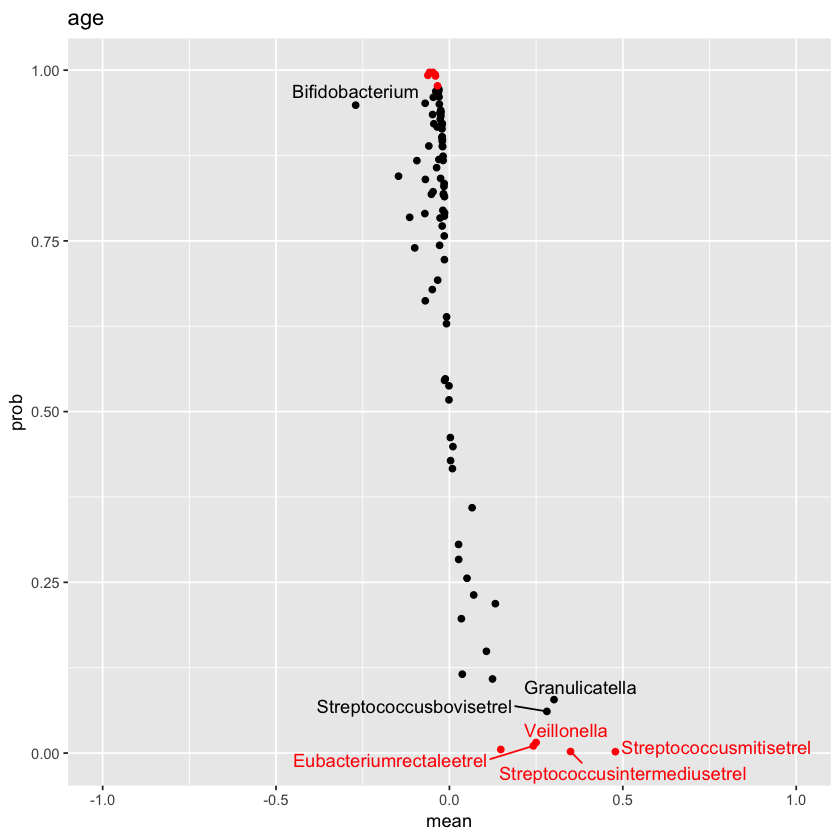

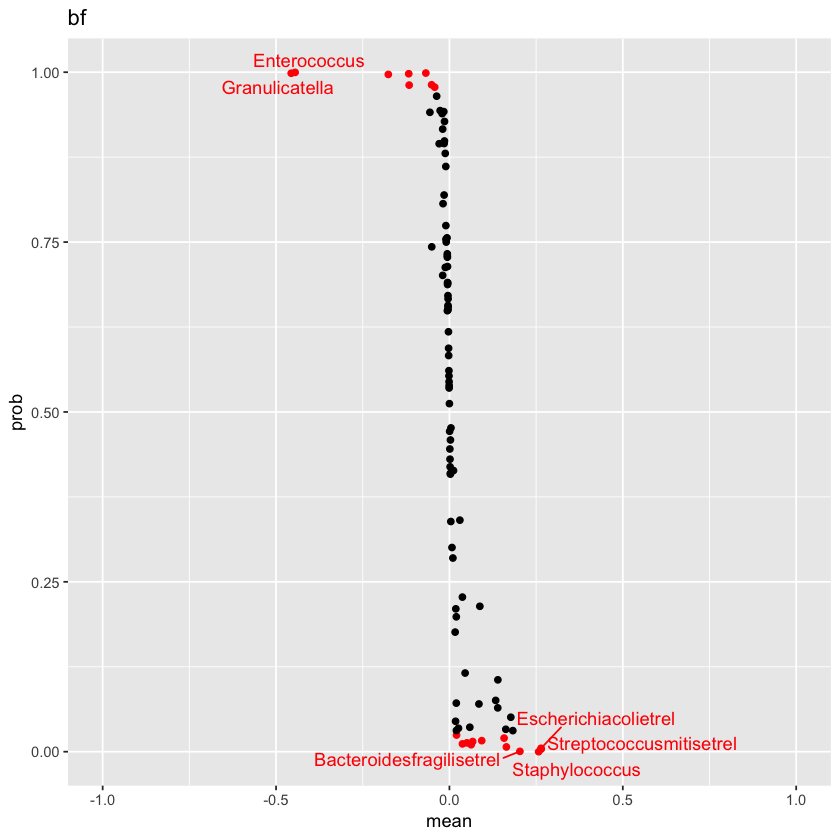

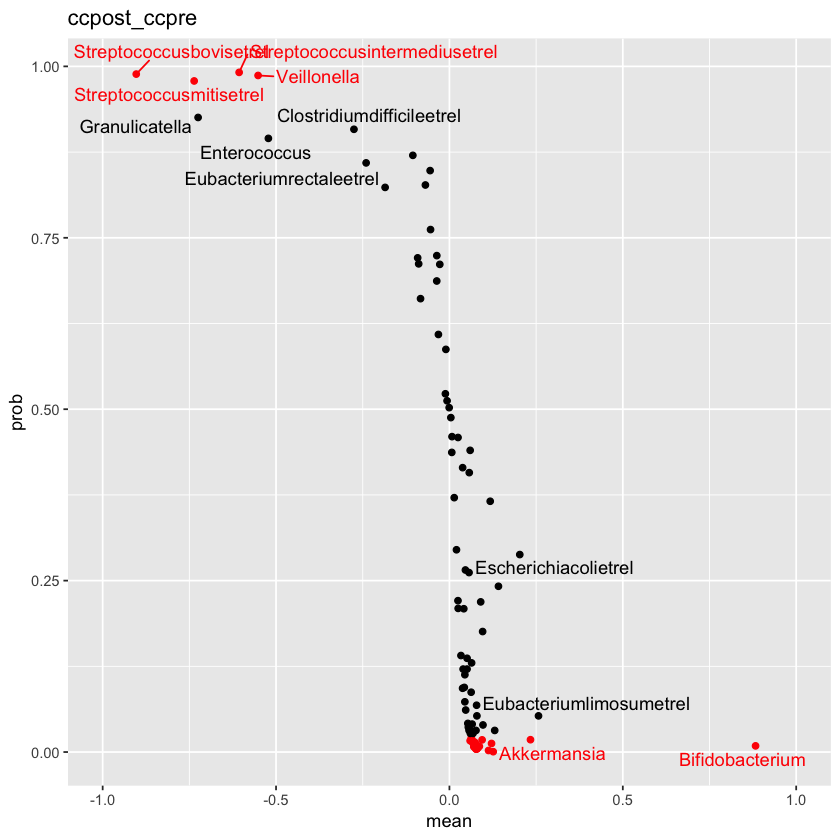

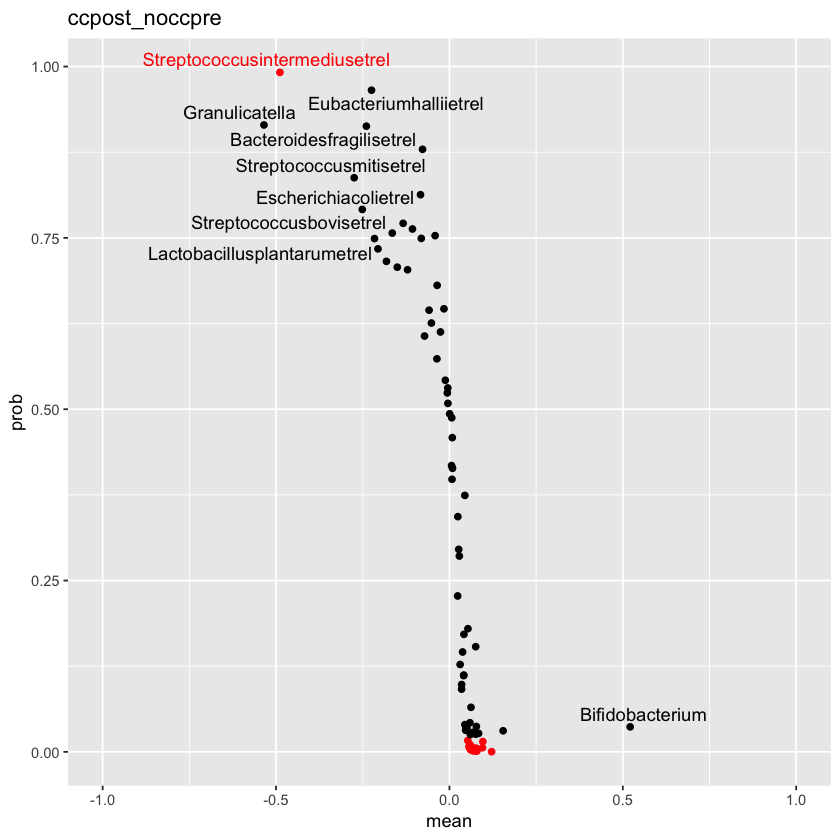

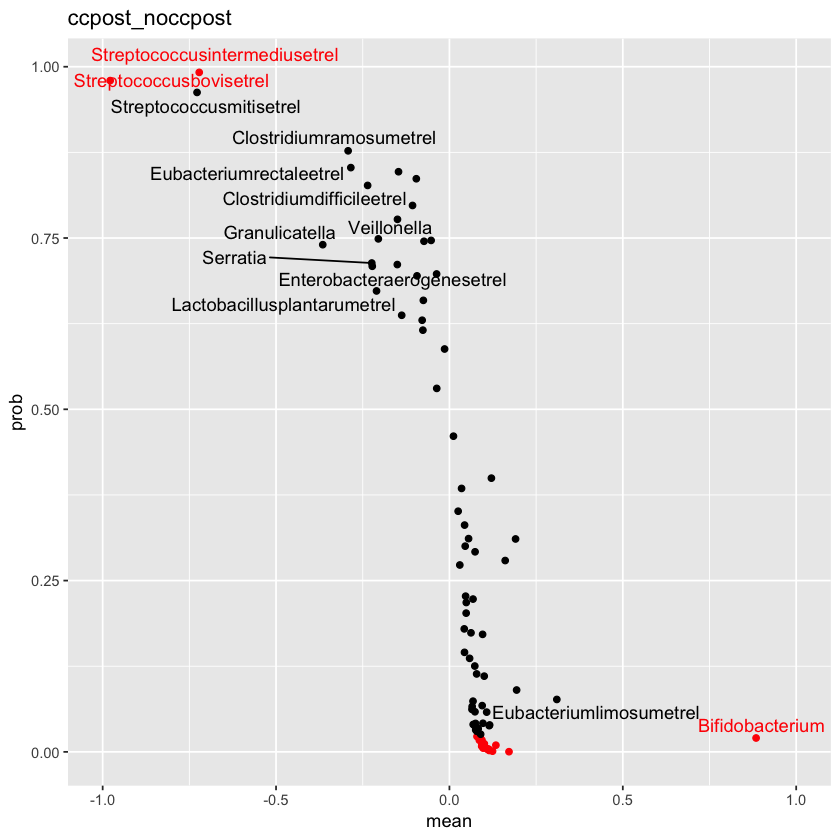

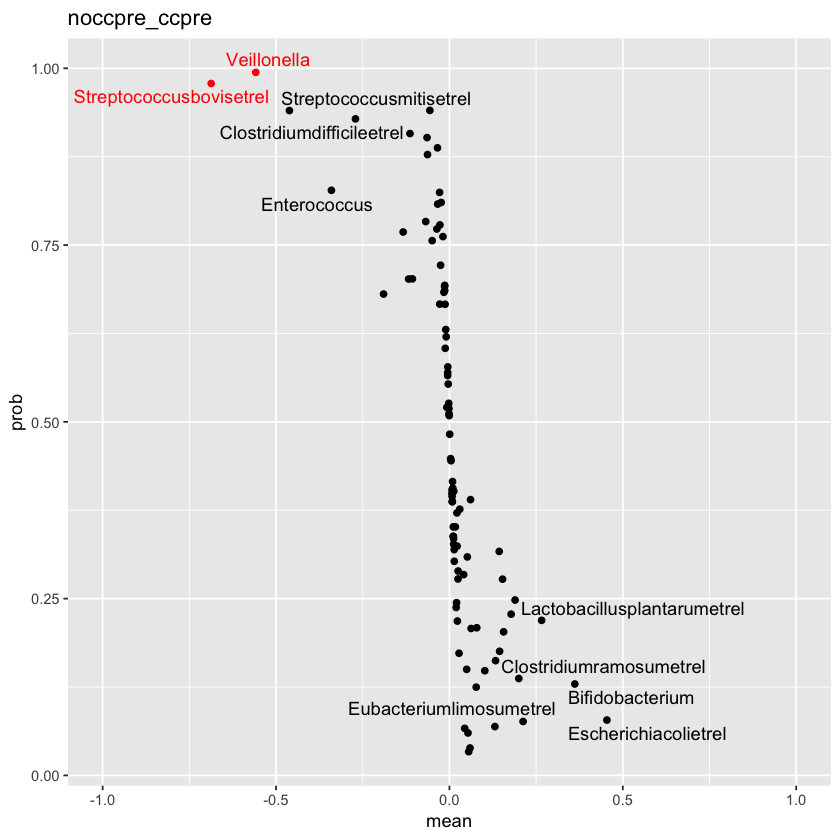

[[1]]

[[2]]

[[3]]

[[4]]

[[5]]

[[6]]

[[7]]

[[8]]


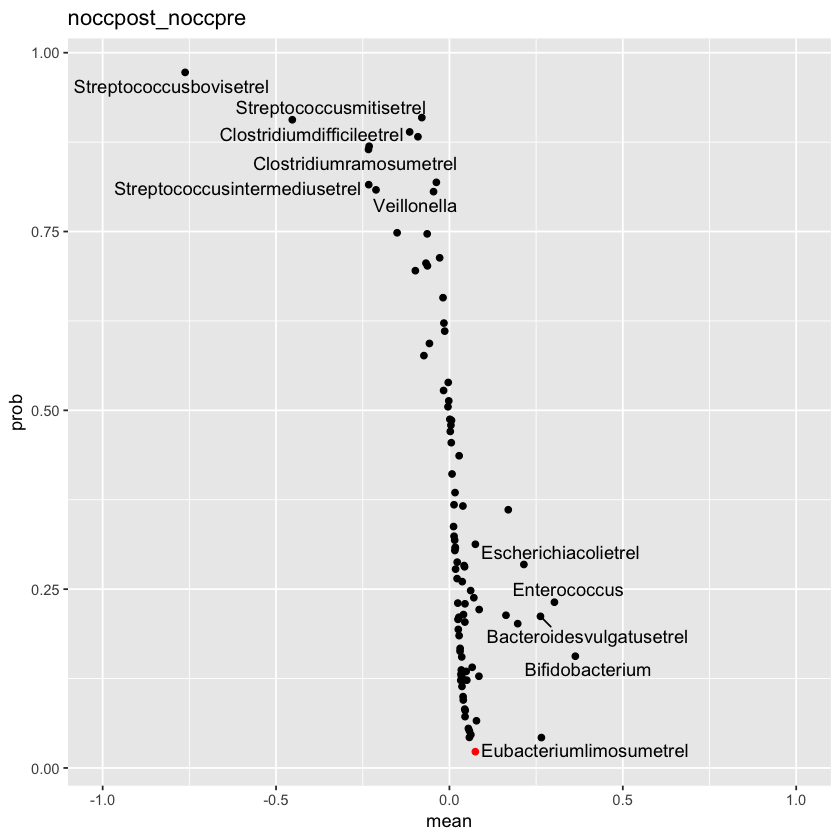

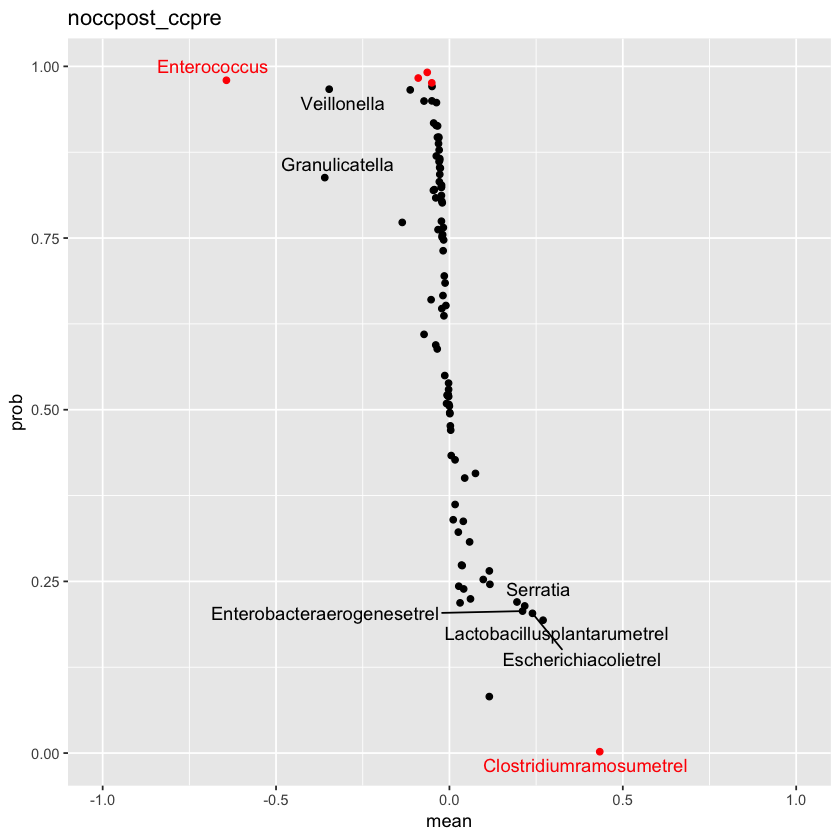

In [51]:


age <- age %>% 
    arrange(prob) %>%
    mutate(qvalue = cummean(prob))
bf <- bf %>% 
    arrange(prob) %>%
    mutate(qvalue = cummean(prob))
ccpost_ccpre <- ccpost_ccpre %>% 
    arrange(prob) %>%
    mutate(qvalue = cummean(prob))
ccpost_noccpre <- ccpost_noccpre %>% 
    arrange(prob) %>%
    mutate(qvalue = cummean(prob))
ccpost_noccpost <- ccpost_noccpost %>% 
    arrange(prob) %>%
    mutate(qvalue = cummean(prob))
noccpre_ccpre <- noccpre_ccpre %>% 
    arrange(prob) %>%
    mutate(qvalue = cummean(prob))
noccpost_noccpre <- noccpost_noccpre %>% 
    arrange(prob) %>%
    mutate(qvalue = cummean(prob))
noccpost_ccpre <- noccpost_ccpre %>% 
    arrange(prob) %>%
    mutate(qvalue = cummean(prob))


effects <- rbind(age, bf, ccpost_ccpre, ccpost_noccpre, ccpost_noccpost, noccpre_ccpre, noccpost_noccpre, noccpost_ccpre)

library(ggrepel)
lapply(effects$effect %>% unique(), function(x){
    effects %>% filter(effect == x) %>%
    ggplot(aes(mean, prob, color = ifelse(prob <= 0.025 | prob >= 0.975, "sig", "notsig"), label = ifelse(abs(mean)>= 0.2, genus, ""))) +
            geom_point() + 
            xlim(-1, 1) +
            ggtitle(x) +
            scale_colour_manual(values = c("sig" = "red", "notsig" = "black")) +
            geom_text_repel() +
            theme(legend.position="none")
})


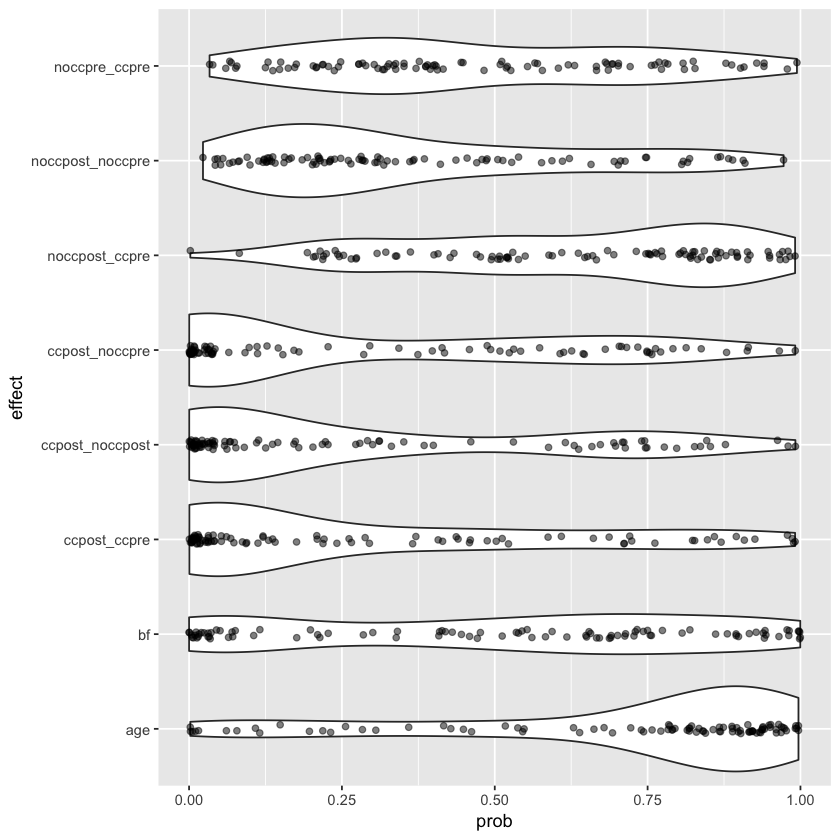

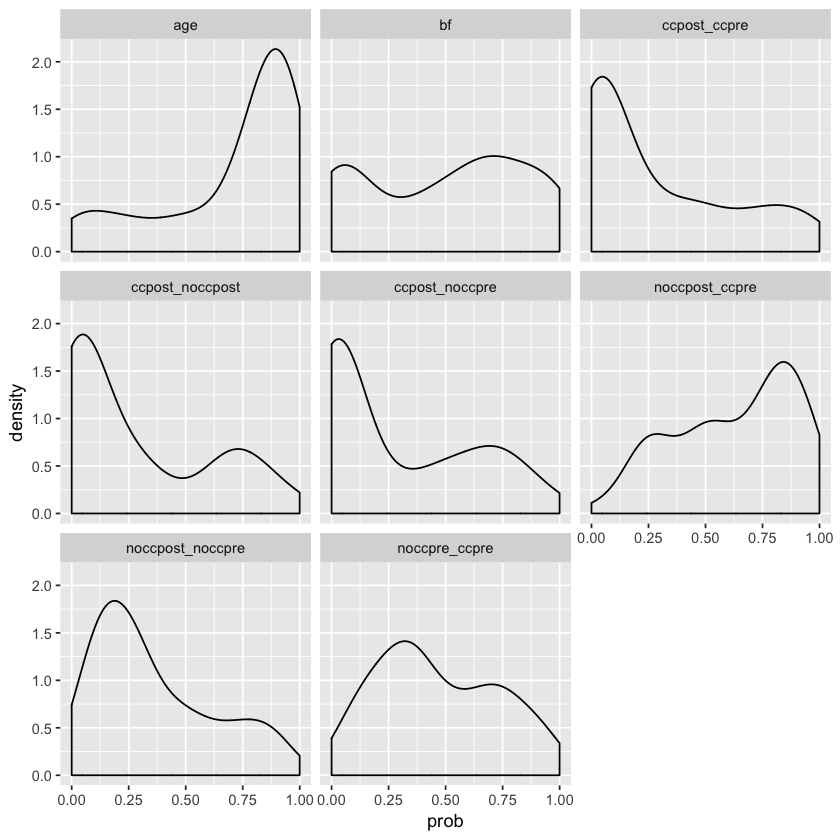

In [52]:
# how are the probabilities distributes? In my understanding, if there is no difference between ccpost
# and the other groups, thus the parameter mu is the same, then the probability that group difference is <0 should be close to 50%. 
# If the parameters where not similar but in a non-systematic way, then p should be uniformly distributed ?!
# But if there is a systematic difference I would expect p mostly either < 0.05 or >0.95
effects %>%
    ggplot(aes(effect, prob)) +
    geom_violin() +
    geom_jitter(alpha = 0.5, width = 0.05) +
    coord_flip()

effects %>% 
    ggplot(aes(prob)) +
    geom_density() +
    facet_wrap(~effect)

In [206]:
otus <- otu_to_df(pseq)
colnames(otus)[which(colnames(otus) == "Clostridium \\(sensu stricto\\)")] <- "Clostridium_sensu_stricto"
colnames(otus) <- c("sample_id", gsub("_", "", colnames(otus)[-1]))
colnames(otus) <- gsub("\\.", "", colnames(otus))
colnames(otus) <- gsub(" ", "", colnames(otus))
otus %>% head()

sample_id Actinomycetaceae Aerococcus Aeromonas Akkermansia
1 sa_10000   95437960        34418153   34341896   124457826 
2 sa_10038   70285829        58269828   33381610  2434095241 
3 sa_10118   74484694        35926846   34115744    75223863 
4 sa_10211   75817084        40500540   34326670    76117189 
5 sa_10230   91935475        38836632   34865566    82247239 
6 sa_10247  178938899        43452449   47039015   111273226 
  Alcaligenesfaecalisetrel Allistipesetrel Anaerobiospirillum Anaerofustis
1 137407761                2775984375      34157714           42828025    
2 132933576                 521047928      33375824           50567189    
3 481367543                2191294227      34663255           37348616    
4 136002009                 539333952      33849464           41735494    
5 142299095                 603211638      34623357           38078013    
6 185161624                 924444438      44724994           44287318    
  Anaerostipescaccaeetrel ⋯ UnculturedClostridialesI UnculturedClostridialesII
1 419128720               ⋯ 1090034884                941458567               
2 548974494               ⋯ 1014275140                900874656               
3 352747041               ⋯ 1043195088                902706575               
4 391142808               ⋯ 1039314491                900511282               
5 372869431               ⋯ 1070584639                914030042               
6 496402245               ⋯ 1354187075               1161864748               
  UnculturedMollicutes UnculturedSelenomonadaceae Veillonella Vibrio   
1 488276988            34707086                    240316757  214057735
2 470740206            33605248                    144559265  137103032
3 484267449            33796119                   1097582790  148665892
4 484154134            34046156                    151586004  136693439
5 496846106            34346655                    321227016  143278207
6 625354140            41136419                    165784702  250727911
  Weissellaetrel Wissellaetrel Xanthomonadaceae Yersiniaetrel
1 120983495      40039127       78167491        139606497    
2 118011101      34110709       73531128        138918492    
3 124607385      33967323       80899392        142086666    
4 109305220      33617468       78163981        139786775    
5 108507603      35725506       81956174        142512960    
6 146390289      48255416      139111255        205029054

In [122]:
otus.clr <- otu_to_df(pseq.clr) %>% 
    column_to_rownames("sample_id")
# PCA with CLR values (euclidean distance of clr transformed values = Aitchison distance) 
pcx <- prcomp(otus.clr)
# extract loadings
pcx_rot <- 
    pcx$rotation %>%
        as.tibble() %>%
        mutate_all(function(x) scale(x)[, 1]) %>%
        add_column(genus = rownames(pcx$rotation))

# add PCs to data
pcs <- pcx$x %>% as.data.frame() %>%
    rownames_to_column("sample_id") %>%
    select(PC1, PC2, PC3, PC4, PC5, sample_id) 

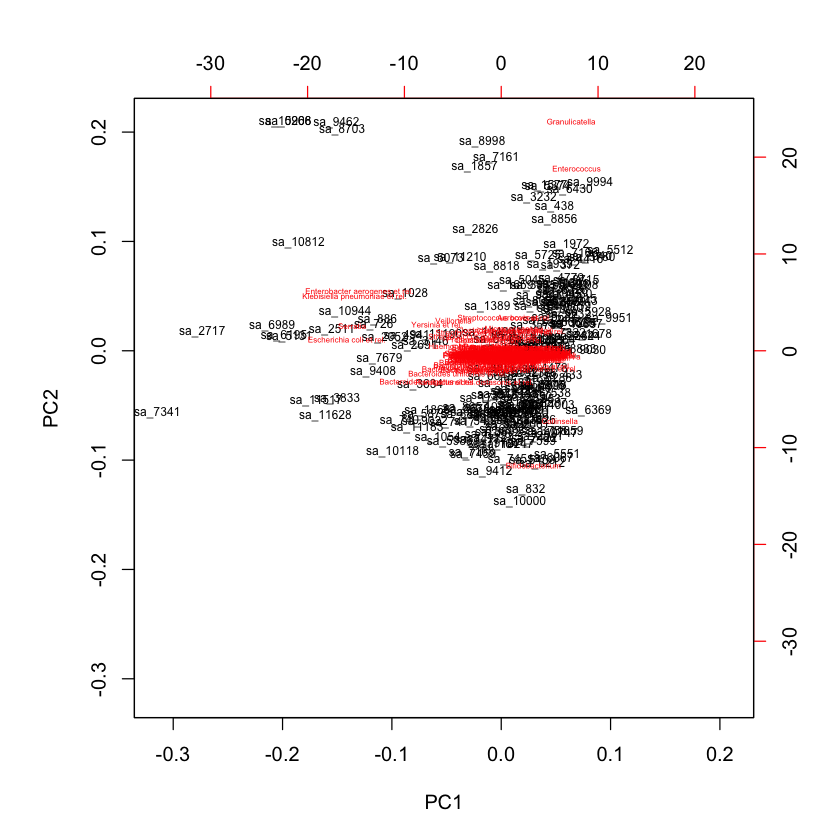

In [123]:
# plot a PCA biplot
# calculate percent variance explained for the axis labels
biplot(pcx, cex=c(0.6,0.4), var.axes=F, scale=1)

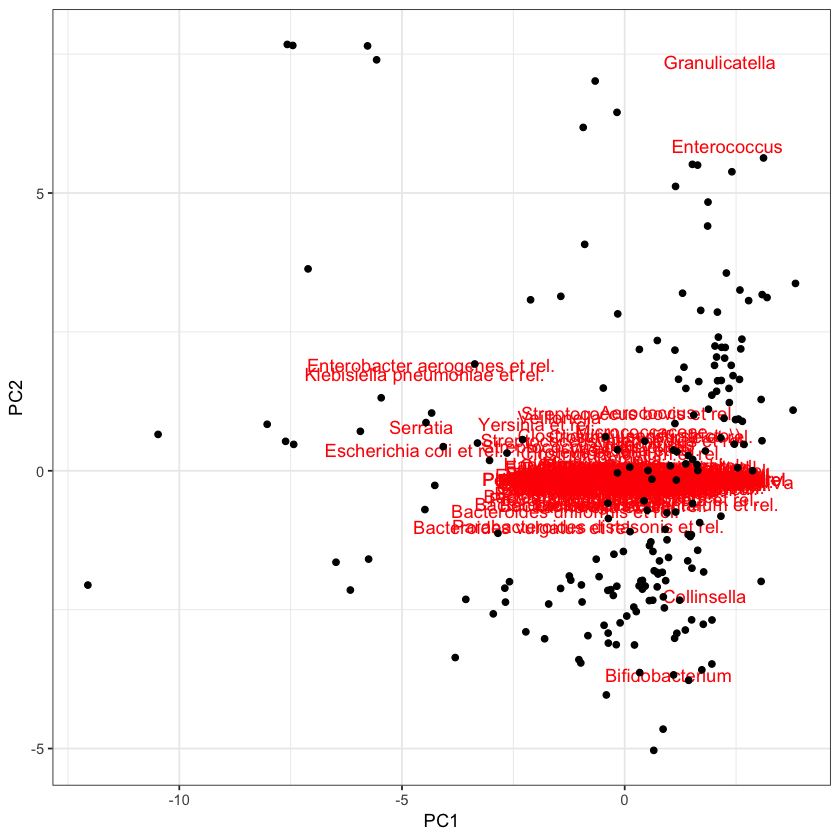

In [127]:
# biplot
pcx$x %>%
    as.tibble() %>%
    add_column(sample_id = rownames(pcx$x))%>%
    ggplot(aes(PC1, PC2, label = sample_id)) +
    geom_text(data = pcx_rot, aes(PC1, PC2, label = genus), color = "red") +
    geom_point() +
    theme_bw()

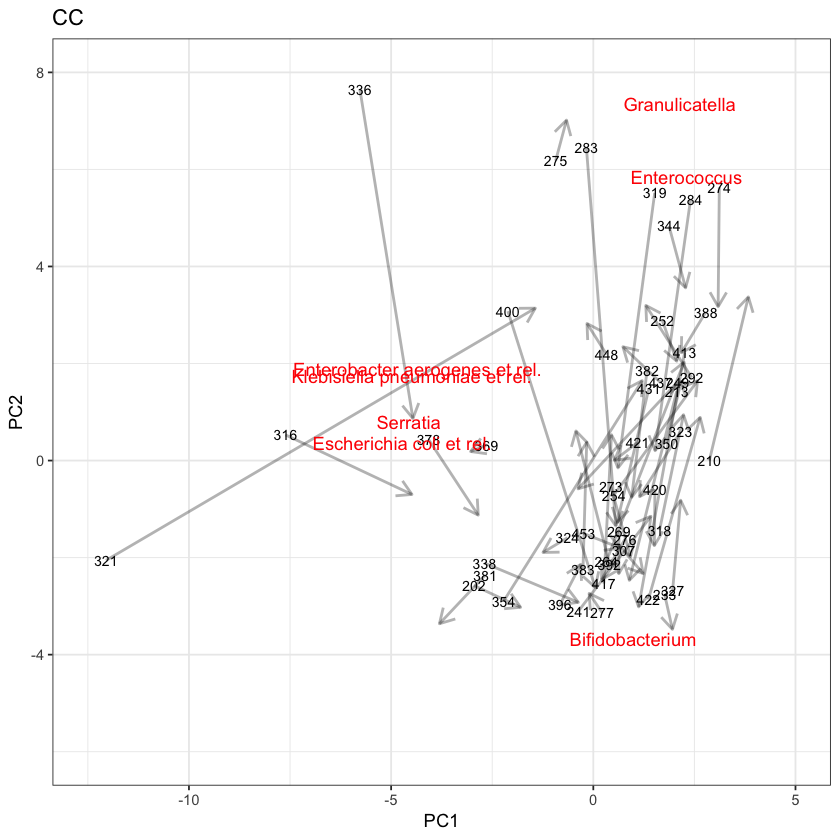

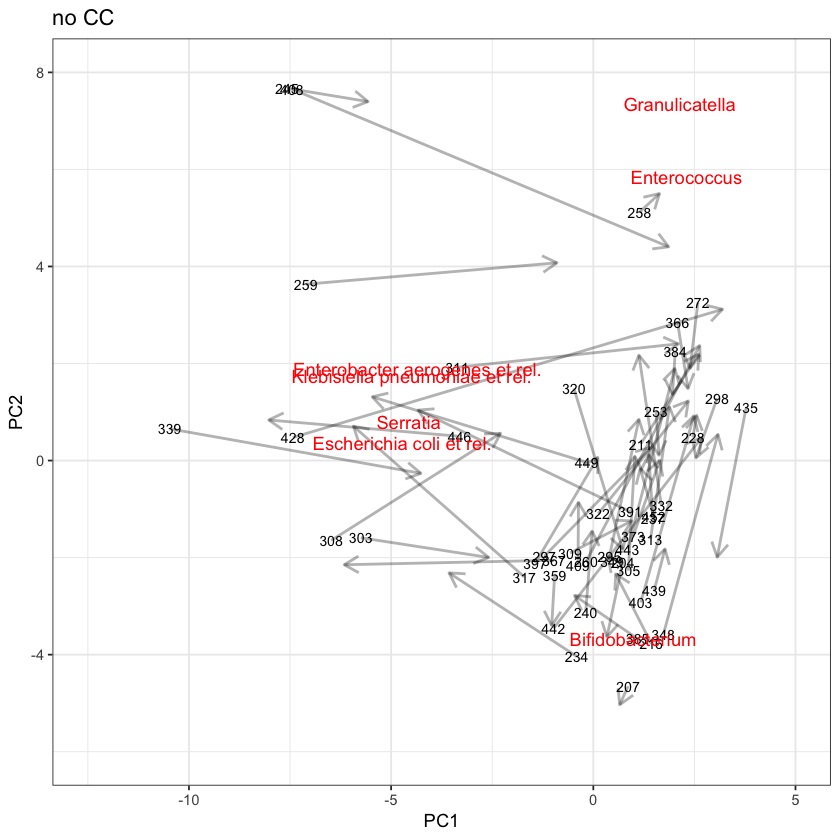

In [128]:
data %>% left_join(pcs, by = "sample_id") %>%
    filter(cc == "yes") %>%
    arrange(time) %>%
    ggplot(aes(PC1, PC2, label = subject_id)) +
    geom_path(aes(group = as.factor(subject_id)), arrow = arrow(length = unit(0.35,"cm"), ends = "last"), alpha = 0.3, size = 0.8) +
    scale_color_manual(values = c("red", "blue")) +
    geom_text(size = 3, aes(label = ifelse(time == "pre", subject_id, ""))) +
    geom_text(
        data = pcx_rot,
        aes(PC1, PC2, label = ifelse(abs(PC1) > 2.5 | abs(PC2) > 2.5, genus, "")), 
            color = "red") +
    xlim(-12.5, 5) + ylim(-6, 8) +
    ggtitle("CC") +
    theme_bw()
data %>% left_join(pcs, by = "sample_id") %>%
    filter(cc == "no") %>%
    arrange(time) %>%
    ggplot(aes(PC1, PC2, label = subject_id)) +
    geom_path(aes(group = as.factor(subject_id)), arrow = arrow(length = unit(0.35,"cm"), ends = "last"), alpha = 0.3, size = 0.8) +
    scale_color_manual(values = c("red", "blue")) +
    geom_text(size = 3, aes(label = ifelse(time == "pre", subject_id, ""))) +
    geom_text(
        data = pcx_rot,
        aes(PC1, PC2, label = ifelse(abs(PC1) > 2.5 | abs(PC2) > 2.5, genus, "")), 
            color = "red") +
    xlim(-12.5, 5) + ylim(-6, 8) +
    ggtitle("no CC") +
    theme_bw()

In [130]:
pcx$rotation

PC1          PC2          PC3         
Actinomycetaceae                   0.036979050 -0.030015767  0.017511067
Aerococcus                         0.045570717  0.093654287  0.020294085
Aeromonas                          0.018968816 -0.013893288  0.016061165
Akkermansia                        0.071902992 -0.009851492  0.001751523
Alcaligenes faecalis et rel.       0.015685904 -0.011243631  0.017948463
Allistipes et rel.                -0.030699498 -0.048412412  0.018486189
Anaerobiospirillum                -0.008481210 -0.009290236  0.019989403
Anaerofustis                       0.037377245  0.042088348 -0.011331487
Anaerostipes caccae et rel.        0.042954895  0.006992880 -0.019409125
Anaerotruncus colihominis et rel.  0.024078806 -0.011381101  0.010895659
Anaerovorax odorimutans et rel.    0.029865282 -0.011878531 -0.013264910
Aneurinibacillus                   0.024833559 -0.014621066  0.007060466
Aquabacterium                      0.011851647 -0.017359089  0.029728548
Asteroleplasma et rel.             0.020583050 -0.014126056  0.012017558
Atopobium                          0.026204858 -0.022780820 -0.001393925
Bacillus                           0.023132393  0.007410715  0.015565332
Bacteroides fragilis et rel.      -0.092544592 -0.053000033 -0.014900028
Bacteroides intestinalis et rel.  -0.042045300 -0.039930002  0.016430369
Bacteroides ovatus et rel.        -0.041661304 -0.054221352  0.018259966
Bacteroides plebeius et rel.      -0.037400592 -0.034821505  0.010241398
Bacteroides splachnicus et rel.    0.002749263 -0.026432457  0.017934873
Bacteroides stercoris et rel.     -0.022249008 -0.030914716  0.014160247
Bacteroides uniformis et rel.     -0.117095667 -0.063832765 -0.008860941
Bacteroides vulgatus et rel.      -0.198284898 -0.089168574  0.019754182
Bifidobacterium                    0.086769826 -0.323542775  0.118752901
Bilophila et rel.                  0.021724783 -0.017212224  0.017515398
Brachyspira                        0.023092904 -0.014620569  0.012364253
Bryantella formatexigens et rel.   0.016248732 -0.004993602 -0.106641568
Bulleidia moorei et rel.           0.024515802  0.009207783 -0.011807011
Burkholderia                       0.005526017 -0.028434514  0.028115551
⋮                                 ⋮            ⋮            ⋮           
Propionibacterium                 -0.014633000  0.009691446  0.036376157
Proteus et rel.                   -0.081207194  0.032047755  0.037294065
Pseudomonas                       -0.007276814  0.006277309  0.022379272
Roseburia intestinalis et rel.     0.027332565 -0.011485992 -0.008548990
Ruminococcus bromii et rel.        0.020946661  0.004864083  0.012852438
Ruminococcus callidus et rel.      0.024452270 -0.009868733  0.009540924
Ruminococcus gnavus et rel.        0.055246556 -0.009950462 -0.027127399
Ruminococcus lactaris et rel.      0.040481785 -0.013489793 -0.004002356
Ruminococcus obeum et rel.         0.059852638  0.001222184 -0.034965265
Serratia                          -0.401921775  0.069685853  0.065239835
Sporobacter termitidis et rel.     0.027529471 -0.008655155  0.008972952
Staphylococcus                    -0.077178761 -0.009124540 -0.095548004
Streptococcus bovis et rel.        0.008487391  0.091504711 -0.534103649
Streptococcus intermedius et rel. -0.020070794  0.049647331 -0.333968327
Streptococcus mitis et rel.       -0.072930155  0.039123934 -0.541479942
Subdoligranulum variable at rel.   0.041824344 -0.004329181 -0.025606648
Sutterella wadsworthia et rel.     0.001875076 -0.013920922  0.026632970
Tannerella et rel.                -0.045914195 -0.056251295  0.022355429
Uncultured Bacteroidetes          -0.015339292 -0.029151222  0.012055727
Uncultured Chroococcales           0.031314570 -0.016139467 -0.016562943
Uncultured Clostridiales I         0.025295989 -0.018978399  0.017904508
Uncultured Clostridiales II        0.022999105 -0.003337189  0.011412761
Uncultured Mollicutes              0.022508024 -0.014213367  0.011267018
Uncultured Selenomo

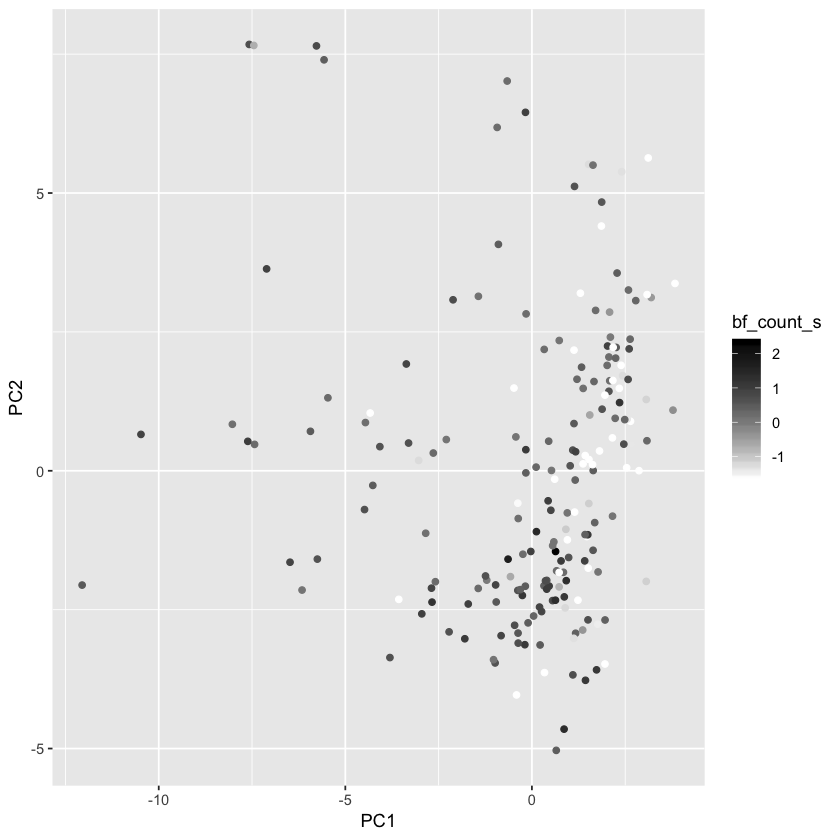

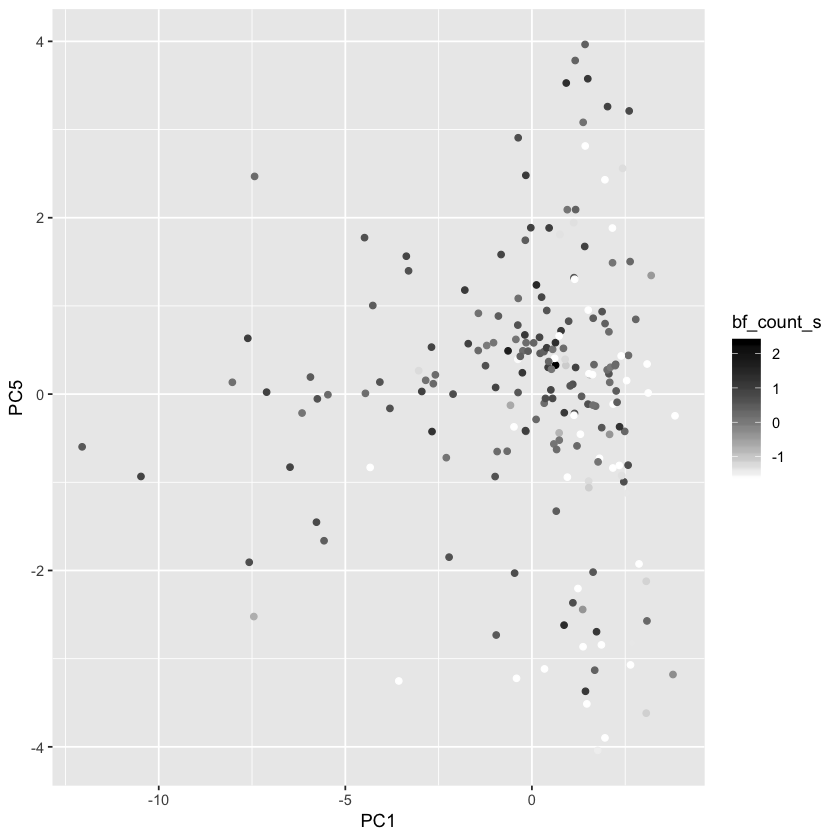

In [184]:
data %>%
    arrange(time) %>%
    ggplot(aes(PC1, PC2, label = subject_id, color = bf_count_s)) +
    geom_point() +
    scale_colour_gradient(low = "white", high = "black") 

data %>%
    arrange(time) %>%
    ggplot(aes(PC1, PC5, label = subject_id, color = bf_count_s)) +
    geom_point() +
    scale_colour_gradient(low = "white", high = "black") 

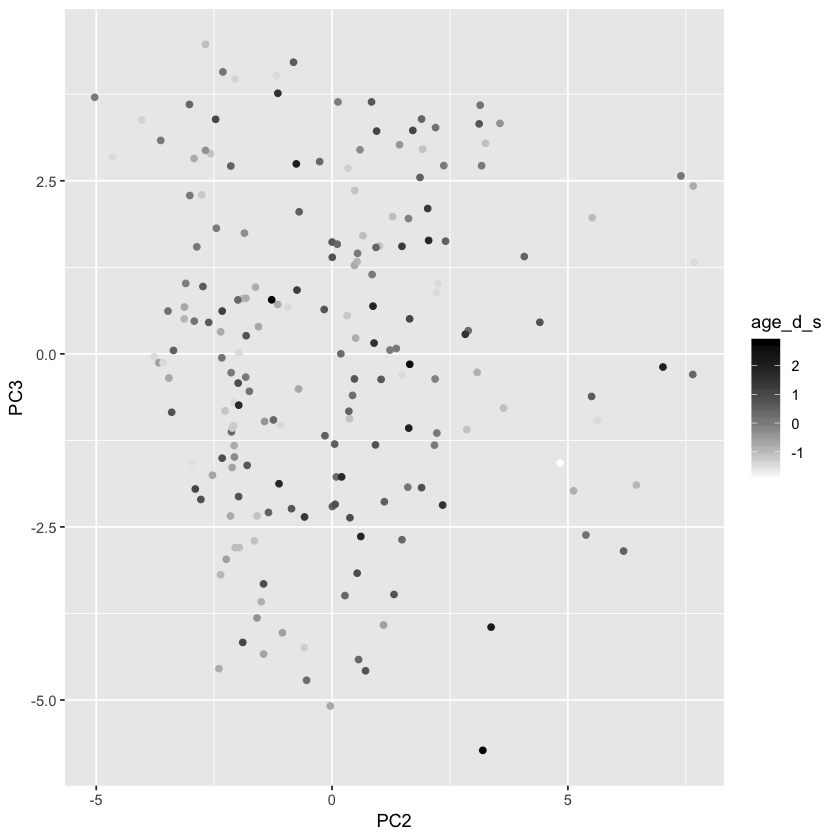

In [174]:
data %>%
    arrange(time) %>%
    ggplot(aes(PC2, PC3, label = subject_id, color = age_d_s)) +
    geom_point() +
    scale_colour_gradient(low = "white", high = "black") 

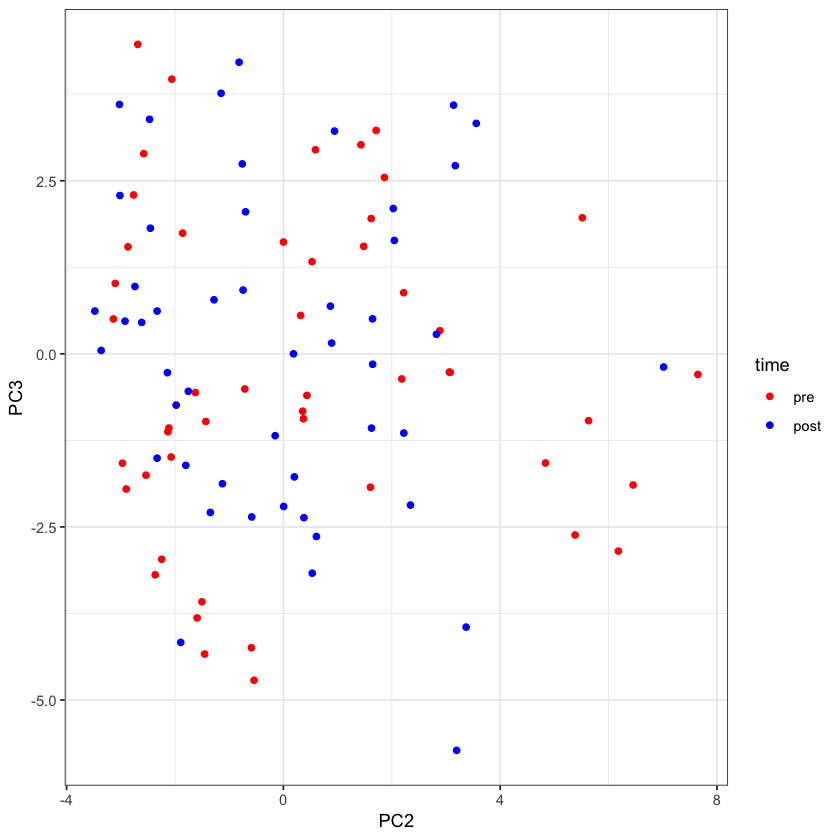

In [176]:
data %>%
    filter(cc == "yes") %>%
    arrange(time) %>%
    ggplot(aes(PC2, PC3, label = subject_id, color = time)) +
    scale_color_manual(values = c("red", "blue")) +
    geom_point() +
    theme_bw()

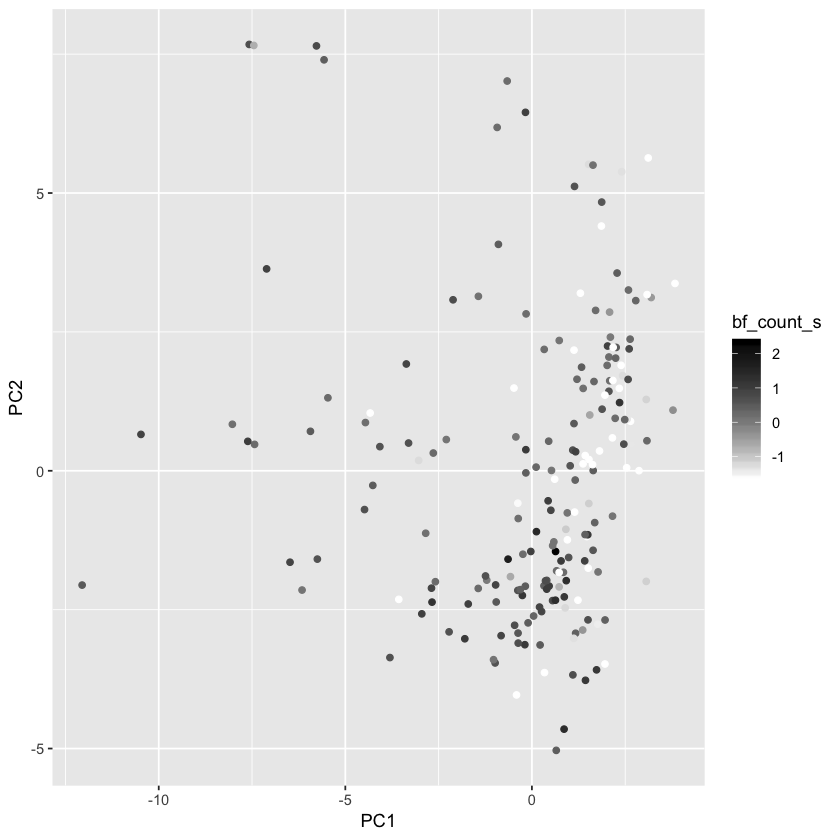

In [177]:
data %>%
    arrange(time) %>%
    ggplot(aes(PC1, PC2, label = subject_id, color = bf_count_s)) +
    geom_point() +
    scale_colour_gradient(low = "white", high = "black") 

In [129]:
data %>% head()

sample_id subject_id time cc  age_d  age_d_s    bf_count bf_count_s  bf_ratio
1 sa_10000  207        post no   98.00  0.0320946 6.00      0.43948544 1       
2 sa_10038  388        post yes  98.00  0.0320946 0.00     -1.65710371 0       
3 sa_10118  381        post yes 108.00  0.5275689 6.59      0.64565004 1       
4 sa_10211  283        post yes 107.03  0.4795079 5.00      0.09005391 1       
5 sa_10230  216        post no  100.00  0.1311895 7.00      0.78891696 1       
6 sa_10247  277        pre  yes  79.00 -0.9093066 6.10      0.47442859 1       
  groups   ⋯ UnculturedSelenomonadaceae Veillonella  Vibrio      Weissellaetrel
1 noCCpost ⋯ -1.927865                   0.007148331 -0.10856367 -0.6791557    
2 CCpost   ⋯ -1.886635                  -0.427628114 -0.48058492 -0.6305389    
3 CCpost   ⋯ -2.070707                   1.409812180 -0.58935180 -0.7658860    
4 CCpost   ⋯ -1.808475                  -0.315039631 -0.41845197 -0.6420485    
5 noCCpost ⋯ -1.818445                   0.417198368 -0.39016133 -0.6681294    
6 CCpre    ⋯ -1.878539                  -0.484742679 -0.07106428 -0.6091564    
  Wissellaetrel Xanthomonadaceae Yersiniaetrel PC1        PC2       PC3        
1 -1.784952     -1.1159389       -0.5359748     0.6522227 -5.032936  3.70614517
2 -1.871706     -1.1035928       -0.4674235     2.1772336  2.222411 -1.14427661
3 -2.065654     -1.1978303       -0.6346092    -3.8048158 -3.362390  0.04935197
4 -1.821147     -0.9773673       -0.3960676     0.5556673 -1.347503 -2.29104841
5 -1.779084     -0.9487484       -0.3955098     0.5538141 -2.336840 -0.05733456
6 -1.718924     -0.6601385       -0.2722749     0.2194597 -3.135664  0.50348477

In [10]:
otus.clr %>% head()

sample_id Actinomycetaceae Aerococcus Aeromonas Akkermansia
1 sa_10000  -0.9163328       -1.936229  -1.938443 -0.6508429 
2 sa_10038  -1.1487472       -1.336237  -1.893312  2.3960122 
3 sa_10118  -1.2804593       -2.009572  -2.061294 -1.2705850 
4 sa_10211  -1.0078688       -1.634881  -1.800270 -1.0039189 
5 sa_10230  -0.8338623       -1.695589  -1.803450 -0.9452201 
6 sa_10247  -0.4083880       -1.823769  -1.744455 -0.8834443 
  Alcaligenesfaecalisetrel Allistipesetrel Anaerobiospirillum Anaerofustis
1 -0.5518563               2.4539521       -1.943824          -1.717616   
2 -0.5114678               0.8545242       -1.893489          -1.478014   
3  0.5855781               2.1011982       -2.045376          -1.970756   
4 -0.4235228               0.9541421       -1.814273          -1.604840   
5 -0.3970182               1.0473187       -1.810424          -1.715311   
6 -0.3742033               1.2337611       -1.794903          -1.804733   
  Anaerostipescaccaeetrel ⋯ UnculturedClostridialesI UnculturedClostridialesII
1 0.5633680               ⋯ 1.519156                 1.372621                 
2 0.9067336               ⋯ 1.520612                 1.402049                 
3 0.2746972               ⋯ 1.358991                 1.214345                 
4 0.6328794               ⋯ 1.610124                 1.466770                 
5 0.5662780               ⋯ 1.621011                 1.462914                 
6 0.6119533               ⋯ 1.615524                 1.462349                 
  UnculturedMollicutes UnculturedSelenomonadaceae Veillonella  Vibrio     
1 0.7160733            -1.927865                   0.007148331 -0.10856367
2 0.7529886            -1.886635                  -0.427628114 -0.48058492
3 0.5915839            -2.070707                   1.409812180 -0.58935180
4 0.8462104            -1.808475                  -0.315039631 -0.41845197
5 0.8533306            -1.818445                   0.417198368 -0.39016133
6 0.8428853            -1.878539                  -0.484742679 -0.07106428
  Weissellaetrel Wissellaetrel Xanthomonadaceae Yersiniaetrel
1 -0.6791557     -1.784952     -1.1159389       -0.5359748   
2 -0.6305389     -1.871706     -1.1035928       -0.4674235   
3 -0.7658860     -2.065654     -1.1978303       -0.6346092   
4 -0.6420485     -1.821147     -0.9773673       -0.3960676   
5 -0.6681294     -1.779084     -0.9487484       -0.3955098   
6 -0.6091564     -1.718924     -0.6601385       -0.2722749

# Simulate false discoveries and compares bayes

In [72]:
sim_data <- function() {
    treat <- c(rep(0, 48), rep(1, 48), rep(0, 48), rep(1, 48))
    time <- c(rep("pre", 96), rep("post", 96))
    pre <- c(rnorm(mean = 0, sd = 2, n = 48), rnorm(mean = 0, sd = 2, n = 48) + rnorm(mean = 0, sd = 1, n = 48))
    post <- c(rnorm(mean = 0, sd = 2, n = 48), rnorm(mean = 0, sd = 2, n = 48) + rnorm(mean = 0, sd = 2, n = 48))
    subject_id <- c(1:96, 1:96)
    df <- tibble(subject_id = subject_id, treat = treat, time = time, outcome = c(pre, post))
    df
}

In [67]:
# first frequ approach
library(lme4)
library(car)
df <- df %>% mutate(treat = as.factor(treat), time = as.factor(time))


In [73]:
lme_fits <-  list()
for (i in 1:130) {
    df <- sim_data()
    l4fit <- lmer(outcome ~ treat*time + (1|subject_id), data = df)
    lme_fit <- Anova(l4fit, test = "F", type = 2) %>% 
                rownames_to_column("effect") %>%
                add_column(genus = i)
    lme_fits[[i]] <- lme_fit 
}


In [96]:
library(brms)
brm_fits <-  list()
for (i in 1:130) {
    df <- sim_data()
    file <- glue("model_{i}")
    brm_fit <- brm(outcome ~ treat*time + (1|subject_id), data = df, prior = c(
        set_prior("normal(0, 1)", class = "b"),
        set_prior("normal(0, 1)", class = "Intercept"),
        set_prior("exponential(30)", class = "sd")), file = here("models/fdr", file), 
        control = list(max_treedepth = 15))
    brm_fits[[i]] <- brm_fit 
}

Compiling the C++ model


In file included from filecb9170214e6.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 6.6e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.66 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.527614 seconds (Warm-up)
Chain 1:                1.96519 seconds (Sampling)
Chain 1:                2.4928 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e5033

Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb93ac4fe73.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 6e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.6 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.612038 seconds (Warm-up)
Chain 1:                0.347736 seconds (Sampling)
Chain 1:                0.959774 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e5033

Warning message:
“There were 1 divergent transitions after warmup. Increasing adapt_delta above 0.8 may help. See
http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”Warning message:
“Examine the pairs() plot to diagnose sampling problems
”Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb92460ccf3.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 7.3e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.73 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.52095 seconds (Warm-up)
Chain 1:                1.16858 seconds (Sampling)
Chain 1:                1.68953 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e5033

Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb99df7168.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:4

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 7.5e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.75 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.581312 seconds (Warm-up)
Chain 1:                0.659935 seconds (Sampling)
Chain 1:                1.24125 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e50

Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb933bddff8.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 7.1e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.71 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.545156 seconds (Warm-up)
Chain 1:                0.783223 seconds (Sampling)
Chain 1:                1.32838 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e50

Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb922123417.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 5.7e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.57 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.523591 seconds (Warm-up)
Chain 1:                0.314733 seconds (Sampling)
Chain 1:                0.838324 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e5

Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb928d13123.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 6.4e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.64 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.594185 seconds (Warm-up)
Chain 1:                0.341676 seconds (Sampling)
Chain 1:                0.935861 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e5

Warning message:
“There were 1 divergent transitions after warmup. Increasing adapt_delta above 0.8 may help. See
http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”Warning message:
“Examine the pairs() plot to diagnose sampling problems
”Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb9292d178d.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 5.7e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.57 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.496301 seconds (Warm-up)
Chain 1:                1.47883 seconds (Sampling)
Chain 1:                1.97514 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e503

Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb930c7bdda.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 5.5e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.55 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.56057 seconds (Warm-up)
Chain 1:                1.24805 seconds (Sampling)
Chain 1:                1.80862 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e5033

Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb9189751d2.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 7.2e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.72 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.558344 seconds (Warm-up)
Chain 1:                1.39798 seconds (Sampling)
Chain 1:                1.95633 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e503

Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb92ca90d5e.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 5.8e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.58 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.540451 seconds (Warm-up)
Chain 1:                1.42356 seconds (Sampling)
Chain 1:                1.96401 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e503

Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb985a911d.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:4

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 6e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.6 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.576071 seconds (Warm-up)
Chain 1:                2.83966 seconds (Sampling)
Chain 1:                3.41573 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e5033a5

Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb9453e307a.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 6.8e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.68 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.536249 seconds (Warm-up)
Chain 1:                2.71444 seconds (Sampling)
Chain 1:                3.25069 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e503

Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb95b0677ae.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 7e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.7 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.651601 seconds (Warm-up)
Chain 1:                0.466162 seconds (Sampling)
Chain 1:                1.11776 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e5033a

Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb93a3821c5.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 5.5e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.55 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.548347 seconds (Warm-up)
Chain 1:                0.322915 seconds (Sampling)
Chain 1:                0.871262 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e5

Warning message:
“There were 1 divergent transitions after warmup. Increasing adapt_delta above 0.8 may help. See
http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”Warning message:
“Examine the pairs() plot to diagnose sampling problems
”Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb931885f9d.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 5.6e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.56 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.52754 seconds (Warm-up)
Chain 1:                0.215789 seconds (Sampling)
Chain 1:                0.743329 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e50

Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb9794984a7.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 6e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.6 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.593491 seconds (Warm-up)
Chain 1:                0.496306 seconds (Sampling)
Chain 1:                1.0898 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e5033a5

Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb95eb5cddc.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 0.000101 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 1.01 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.542415 seconds (Warm-up)
Chain 1:                2.47975 seconds (Sampling)
Chain 1:                3.02216 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e50

Warning message:
“There were 1 divergent transitions after warmup. Increasing adapt_delta above 0.8 may help. See
http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”Warning message:
“Examine the pairs() plot to diagnose sampling problems
”Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb9446138e6.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 5.8e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.58 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.519699 seconds (Warm-up)
Chain 1:                0.333392 seconds (Sampling)
Chain 1:                0.853091 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e5

Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb94756876e.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 5.8e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.58 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.617617 seconds (Warm-up)
Chain 1:                0.180622 seconds (Sampling)
Chain 1:                0.798239 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e5

Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb93d52c9cb.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 6.4e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.64 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.580875 seconds (Warm-up)
Chain 1:                0.342182 seconds (Sampling)
Chain 1:                0.923057 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e5

Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb93a2de0d5.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 6.9e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.69 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.594173 seconds (Warm-up)
Chain 1:                1.21503 seconds (Sampling)
Chain 1:                1.8092 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e5033

Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb9448989af.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 6.6e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.66 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.525765 seconds (Warm-up)
Chain 1:                0.339917 seconds (Sampling)
Chain 1:                0.865682 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e5

Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb9414f28b7.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 6e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.6 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.518137 seconds (Warm-up)
Chain 1:                0.473434 seconds (Sampling)
Chain 1:                0.991571 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e5033

Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb97c8e32de.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 6e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.6 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.51749 seconds (Warm-up)
Chain 1:                0.325492 seconds (Sampling)
Chain 1:                0.842982 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e5033a

Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb954252e9c.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 7.6e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.76 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.514112 seconds (Warm-up)
Chain 1:                1.9398 seconds (Sampling)
Chain 1:                2.45391 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e5033

Warning message:
“There were 1 divergent transitions after warmup. Increasing adapt_delta above 0.8 may help. See
http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”Warning message:
“Examine the pairs() plot to diagnose sampling problems
”Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb91f2ddd39.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 6.2e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.62 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.556839 seconds (Warm-up)
Chain 1:                0.335705 seconds (Sampling)
Chain 1:                0.892544 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e5

Warning message:
“There were 1 divergent transitions after warmup. Increasing adapt_delta above 0.8 may help. See
http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”Warning message:
“Examine the pairs() plot to diagnose sampling problems
”Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb9335a14f3.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 7e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.7 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.559629 seconds (Warm-up)
Chain 1:                0.682821 seconds (Sampling)
Chain 1:                1.24245 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e5033a

Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb97b0c65e7.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 6.4e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.64 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.511638 seconds (Warm-up)
Chain 1:                1.30435 seconds (Sampling)
Chain 1:                1.81599 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e503

Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb9476a32ad.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 5.8e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.58 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.530531 seconds (Warm-up)
Chain 1:                0.650265 seconds (Sampling)
Chain 1:                1.1808 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e503

Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb9c7860c9.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:4

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 5.9e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.59 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.551732 seconds (Warm-up)
Chain 1:                0.658318 seconds (Sampling)
Chain 1:                1.21005 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e50

Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb9feb1260.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:4

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 6.3e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.63 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.572269 seconds (Warm-up)
Chain 1:                0.337172 seconds (Sampling)
Chain 1:                0.909441 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e5

Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb95fdd06ed.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 6.9e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.69 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.528214 seconds (Warm-up)
Chain 1:                0.244322 seconds (Sampling)
Chain 1:                0.772536 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e5

Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb948a112ed.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 6.1e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.61 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.555061 seconds (Warm-up)
Chain 1:                0.324938 seconds (Sampling)
Chain 1:                0.879999 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e5

Warning message:
“There were 3 divergent transitions after warmup. Increasing adapt_delta above 0.8 may help. See
http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”Warning message:
“Examine the pairs() plot to diagnose sampling problems
”Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb9c9f4707.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:4

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 7e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.7 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.587512 seconds (Warm-up)
Chain 1:                1.93658 seconds (Sampling)
Chain 1:                2.52409 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e5033a5

Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb96c6cd7c2.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 5.8e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.58 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.529318 seconds (Warm-up)
Chain 1:                0.352027 seconds (Sampling)
Chain 1:                0.881345 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e5

Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb9376c4e4.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:4

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 6.3e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.63 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.533904 seconds (Warm-up)
Chain 1:                2.68255 seconds (Sampling)
Chain 1:                3.21645 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e503

Warning message:
“There were 1 divergent transitions after warmup. Increasing adapt_delta above 0.8 may help. See
http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”Warning message:
“Examine the pairs() plot to diagnose sampling problems
”Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb970b6a87e.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 5.8e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.58 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.542271 seconds (Warm-up)
Chain 1:                0.321215 seconds (Sampling)
Chain 1:                0.863486 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e5

Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb97311a065.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 6.5e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.65 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.530755 seconds (Warm-up)
Chain 1:                2.68419 seconds (Sampling)
Chain 1:                3.21494 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e503

Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb914cb7215.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 5.8e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.58 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.526089 seconds (Warm-up)
Chain 1:                1.9174 seconds (Sampling)
Chain 1:                2.44349 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e5033

Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb94c4b3dec.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 5.7e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.57 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.541404 seconds (Warm-up)
Chain 1:                2.71531 seconds (Sampling)
Chain 1:                3.25671 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e503

Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb9291c5e4f.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 7.3e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.73 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.542248 seconds (Warm-up)
Chain 1:                1.03755 seconds (Sampling)
Chain 1:                1.57979 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e503

Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb973806661.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 5.7e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.57 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.536663 seconds (Warm-up)
Chain 1:                0.33014 seconds (Sampling)
Chain 1:                0.866803 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e50

Warning message:
“There were 1 divergent transitions after warmup. Increasing adapt_delta above 0.8 may help. See
http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”Warning message:
“Examine the pairs() plot to diagnose sampling problems
”Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb9729a76ba.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 8.1e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.81 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.567855 seconds (Warm-up)
Chain 1:                0.333603 seconds (Sampling)
Chain 1:                0.901458 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e5

Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb95dec842d.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 6.4e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.64 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.505195 seconds (Warm-up)
Chain 1:                0.3258 seconds (Sampling)
Chain 1:                0.830995 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e503

Warning message:
“There were 3 divergent transitions after warmup. Increasing adapt_delta above 0.8 may help. See
http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”Warning message:
“Examine the pairs() plot to diagnose sampling problems
”Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb951f1a879.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 6.1e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.61 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.490012 seconds (Warm-up)
Chain 1:                0.176687 seconds (Sampling)
Chain 1:                0.666699 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e5

Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb929de12d4.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 5.7e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.57 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.543685 seconds (Warm-up)
Chain 1:                0.314697 seconds (Sampling)
Chain 1:                0.858382 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e5

Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb94e1dc16.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:4

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 5.8e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.58 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.496394 seconds (Warm-up)
Chain 1:                0.515434 seconds (Sampling)
Chain 1:                1.01183 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e50

Warning message:
“There were 2 divergent transitions after warmup. Increasing adapt_delta above 0.8 may help. See
http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”Warning message:
“Examine the pairs() plot to diagnose sampling problems
”Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb923831c27.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 7.2e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.72 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.459694 seconds (Warm-up)
Chain 1:                0.302126 seconds (Sampling)
Chain 1:                0.76182 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e50

Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb91d42cf8.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:4

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 5.8e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.58 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.529344 seconds (Warm-up)
Chain 1:                1.52431 seconds (Sampling)
Chain 1:                2.05366 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e503

Warning message:
“There were 1 divergent transitions after warmup. Increasing adapt_delta above 0.8 may help. See
http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”Warning message:
“Examine the pairs() plot to diagnose sampling problems
”Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb910725c62.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 6.6e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.66 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.550783 seconds (Warm-up)
Chain 1:                2.94678 seconds (Sampling)
Chain 1:                3.49756 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e503

Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb976dd9cb0.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 5.9e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.59 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.519657 seconds (Warm-up)
Chain 1:                0.310085 seconds (Sampling)
Chain 1:                0.829742 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e5

Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb97344252.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:4

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 5.8e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.58 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.513844 seconds (Warm-up)
Chain 1:                2.75771 seconds (Sampling)
Chain 1:                3.27156 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e503

Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb92cfc13c6.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 5.7e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.57 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.517621 seconds (Warm-up)
Chain 1:                0.34765 seconds (Sampling)
Chain 1:                0.865271 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e50

Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb94987748c.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 5.9e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.59 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.487001 seconds (Warm-up)
Chain 1:                0.333962 seconds (Sampling)
Chain 1:                0.820963 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e5

Warning message:
“There were 3 divergent transitions after warmup. Increasing adapt_delta above 0.8 may help. See
http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”Warning message:
“Examine the pairs() plot to diagnose sampling problems
”Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb97e53ee6e.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 5.9e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.59 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.562054 seconds (Warm-up)
Chain 1:                0.304019 seconds (Sampling)
Chain 1:                0.866073 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e5

Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb9141dac6f.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 5.9e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.59 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.510776 seconds (Warm-up)
Chain 1:                0.555275 seconds (Sampling)
Chain 1:                1.06605 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e50

Warning message:
“There were 1 divergent transitions after warmup. Increasing adapt_delta above 0.8 may help. See
http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”Warning message:
“Examine the pairs() plot to diagnose sampling problems
”Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb95b21bebc.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 5.6e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.56 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.528843 seconds (Warm-up)
Chain 1:                0.738124 seconds (Sampling)
Chain 1:                1.26697 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e50

Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb93d46cdcb.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 6.7e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.67 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.596114 seconds (Warm-up)
Chain 1:                1.59272 seconds (Sampling)
Chain 1:                2.18883 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e503

Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb914e40db0.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 5.7e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.57 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.540459 seconds (Warm-up)
Chain 1:                0.310698 seconds (Sampling)
Chain 1:                0.851157 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e5

Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb93b2e175.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:4

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 5.8e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.58 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.518521 seconds (Warm-up)
Chain 1:                0.304824 seconds (Sampling)
Chain 1:                0.823345 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e5

Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb9dc1fb8c.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:4

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 6.1e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.61 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.486633 seconds (Warm-up)
Chain 1:                3.45892 seconds (Sampling)
Chain 1:                3.94556 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e503

Warning message:
“There were 1 divergent transitions after warmup. Increasing adapt_delta above 0.8 may help. See
http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”Warning message:
“Examine the pairs() plot to diagnose sampling problems
”Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb93498c795.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 6e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.6 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.534798 seconds (Warm-up)
Chain 1:                0.305411 seconds (Sampling)
Chain 1:                0.840209 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e5033

Warning message:
“There were 1 divergent transitions after warmup. Increasing adapt_delta above 0.8 may help. See
http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”Warning message:
“Examine the pairs() plot to diagnose sampling problems
”Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb974eecf4c.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 5.8e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.58 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.526331 seconds (Warm-up)
Chain 1:                2.22929 seconds (Sampling)
Chain 1:                2.75562 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e503

Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb918b0302e.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 5.7e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.57 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.542609 seconds (Warm-up)
Chain 1:                0.181425 seconds (Sampling)
Chain 1:                0.724034 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e5

Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb97d2dea4a.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 5.9e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.59 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.502395 seconds (Warm-up)
Chain 1:                0.312601 seconds (Sampling)
Chain 1:                0.814996 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e5

Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb916f630d5.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 5.7e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.57 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.507956 seconds (Warm-up)
Chain 1:                0.312899 seconds (Sampling)
Chain 1:                0.820855 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e5

Warning message:
“There were 1 divergent transitions after warmup. Increasing adapt_delta above 0.8 may help. See
http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”Warning message:
“Examine the pairs() plot to diagnose sampling problems
”Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb94c33c598.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 5.7e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.57 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.493969 seconds (Warm-up)
Chain 1:                0.313599 seconds (Sampling)
Chain 1:                0.807568 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e5

Warning message:
“There were 1 divergent transitions after warmup. Increasing adapt_delta above 0.8 may help. See
http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”Warning message:
“Examine the pairs() plot to diagnose sampling problems
”Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb94f89a768.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 5.6e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.56 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.536841 seconds (Warm-up)
Chain 1:                0.313962 seconds (Sampling)
Chain 1:                0.850803 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e5

Warning message:
“There were 2 divergent transitions after warmup. Increasing adapt_delta above 0.8 may help. See
http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”Warning message:
“Examine the pairs() plot to diagnose sampling problems
”Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb93ead024b.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 5.3e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.53 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.508619 seconds (Warm-up)
Chain 1:                0.423049 seconds (Sampling)
Chain 1:                0.931668 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e5

Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb969e1a91a.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 5.4e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.54 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.548563 seconds (Warm-up)
Chain 1:                0.324682 seconds (Sampling)
Chain 1:                0.873245 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e5

Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb958524450.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 6e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.6 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.508692 seconds (Warm-up)
Chain 1:                0.633166 seconds (Sampling)
Chain 1:                1.14186 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e5033a

Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb914e5acfd.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 5.6e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.56 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.504114 seconds (Warm-up)
Chain 1:                0.313077 seconds (Sampling)
Chain 1:                0.817191 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e5

Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb936552c0e.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 5.3e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.53 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.510847 seconds (Warm-up)
Chain 1:                1.0293 seconds (Sampling)
Chain 1:                1.54015 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e5033

Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb949a627c9.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 5.8e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.58 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.533255 seconds (Warm-up)
Chain 1:                0.32166 seconds (Sampling)
Chain 1:                0.854915 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e50

Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb94686cd11.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 5.7e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.57 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.521802 seconds (Warm-up)
Chain 1:                0.311085 seconds (Sampling)
Chain 1:                0.832887 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e5

Warning message:
“There were 1 divergent transitions after warmup. Increasing adapt_delta above 0.8 may help. See
http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”Warning message:
“Examine the pairs() plot to diagnose sampling problems
”Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb92e5372a8.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 5.8e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.58 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.51304 seconds (Warm-up)
Chain 1:                0.244935 seconds (Sampling)
Chain 1:                0.757975 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e50

Warning message:
“There were 1 divergent transitions after warmup. Increasing adapt_delta above 0.8 may help. See
http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”Warning message:
“Examine the pairs() plot to diagnose sampling problems
”Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb97e6ea5e7.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 5.7e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.57 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.524197 seconds (Warm-up)
Chain 1:                1.50651 seconds (Sampling)
Chain 1:                2.03071 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e503

Warning message:
“There were 3 divergent transitions after warmup. Increasing adapt_delta above 0.8 may help. See
http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”Warning message:
“Examine the pairs() plot to diagnose sampling problems
”Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb9a813553.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:4

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 5.5e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.55 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.514336 seconds (Warm-up)
Chain 1:                0.305314 seconds (Sampling)
Chain 1:                0.81965 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e50

Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb92954a0aa.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 6.7e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.67 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.517171 seconds (Warm-up)
Chain 1:                2.89357 seconds (Sampling)
Chain 1:                3.41074 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e503

Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb938ab2fb5.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 5.9e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.59 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.55436 seconds (Warm-up)
Chain 1:                0.322488 seconds (Sampling)
Chain 1:                0.876848 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e50

Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb97985aa03.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 5.8e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.58 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.524588 seconds (Warm-up)
Chain 1:                1.23365 seconds (Sampling)
Chain 1:                1.75823 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e503

Warning message:
“There were 2 divergent transitions after warmup. Increasing adapt_delta above 0.8 may help. See
http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”Warning message:
“Examine the pairs() plot to diagnose sampling problems
”Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb9714396f3.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 6.5e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.65 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.550947 seconds (Warm-up)
Chain 1:                2.09245 seconds (Sampling)
Chain 1:                2.64339 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e503

Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb97a8d4c56.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 5.5e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.55 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.489431 seconds (Warm-up)
Chain 1:                0.392582 seconds (Sampling)
Chain 1:                0.882013 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e5

Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb974704e92.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 5.4e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.54 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.487095 seconds (Warm-up)
Chain 1:                0.355117 seconds (Sampling)
Chain 1:                0.842212 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e5

Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb97cbca31.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:4

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 5.6e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.56 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.518528 seconds (Warm-up)
Chain 1:                0.963044 seconds (Sampling)
Chain 1:                1.48157 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e50

Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb92b70fc82.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 5.6e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.56 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.5168 seconds (Warm-up)
Chain 1:                2.67626 seconds (Sampling)
Chain 1:                3.19306 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e5033a

Warning message:
“There were 2 divergent transitions after warmup. Increasing adapt_delta above 0.8 may help. See
http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”Warning message:
“Examine the pairs() plot to diagnose sampling problems
”Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb974deb079.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 6.4e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.64 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.578864 seconds (Warm-up)
Chain 1:                0.463824 seconds (Sampling)
Chain 1:                1.04269 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e50

Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb920f5ba2a.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 5.5e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.55 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.534787 seconds (Warm-up)
Chain 1:                2.16017 seconds (Sampling)
Chain 1:                2.69496 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e503

Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb97f914833.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 5.7e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.57 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.469096 seconds (Warm-up)
Chain 1:                1.34028 seconds (Sampling)
Chain 1:                1.80938 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e503

Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb9126e177d.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 5.6e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.56 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.48843 seconds (Warm-up)
Chain 1:                0.304432 seconds (Sampling)
Chain 1:                0.792862 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e50

Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb96ec8cea9.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 6.1e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.61 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.553751 seconds (Warm-up)
Chain 1:                0.721239 seconds (Sampling)
Chain 1:                1.27499 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e50

Warning message:
“There were 2 divergent transitions after warmup. Increasing adapt_delta above 0.8 may help. See
http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”Warning message:
“Examine the pairs() plot to diagnose sampling problems
”Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb92ecd2777.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 6.6e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.66 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.547229 seconds (Warm-up)
Chain 1:                1.00388 seconds (Sampling)
Chain 1:                1.55111 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e503

Warning message:
“There were 1 divergent transitions after warmup. Increasing adapt_delta above 0.8 may help. See
http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”Warning message:
“Examine the pairs() plot to diagnose sampling problems
”Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb968d0f7a1.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 5.7e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.57 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.474668 seconds (Warm-up)
Chain 1:                0.326007 seconds (Sampling)
Chain 1:                0.800675 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e5

Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb97f2c0409.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 6e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.6 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.489664 seconds (Warm-up)
Chain 1:                1.63628 seconds (Sampling)
Chain 1:                2.12594 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e5033a5

Warning message:
“There were 1 divergent transitions after warmup. Increasing adapt_delta above 0.8 may help. See
http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”Warning message:
“Examine the pairs() plot to diagnose sampling problems
”Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb92e55841b.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 5.7e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.57 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.498471 seconds (Warm-up)
Chain 1:                0.888256 seconds (Sampling)
Chain 1:                1.38673 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e50

Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb94bf100f0.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 5.8e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.58 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.481282 seconds (Warm-up)
Chain 1:                0.310668 seconds (Sampling)
Chain 1:                0.79195 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e50

Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb9426a5728.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 5.7e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.57 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.502591 seconds (Warm-up)
Chain 1:                0.898325 seconds (Sampling)
Chain 1:                1.40092 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e50

Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb963cd287c.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 5.4e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.54 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.501787 seconds (Warm-up)
Chain 1:                0.31387 seconds (Sampling)
Chain 1:                0.815657 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e50

Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb977ce577a.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 5.7e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.57 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.479507 seconds (Warm-up)
Chain 1:                0.159989 seconds (Sampling)
Chain 1:                0.639496 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e5

Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb920e89c0.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:4

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 6e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.6 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.512755 seconds (Warm-up)
Chain 1:                0.633864 seconds (Sampling)
Chain 1:                1.14662 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e5033a

Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb96b9a4c03.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 5.8e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.58 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.475273 seconds (Warm-up)
Chain 1:                0.30366 seconds (Sampling)
Chain 1:                0.778933 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e50

Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb961209cb4.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 5.7e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.57 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.484898 seconds (Warm-up)
Chain 1:                0.31073 seconds (Sampling)
Chain 1:                0.795628 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e50

Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb925989cca.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 5.9e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.59 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.499903 seconds (Warm-up)
Chain 1:                0.336367 seconds (Sampling)
Chain 1:                0.83627 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e50

Warning message:
“There were 3 divergent transitions after warmup. Increasing adapt_delta above 0.8 may help. See
http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”Warning message:
“Examine the pairs() plot to diagnose sampling problems
”Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb9d073f9c.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:4

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 6.2e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.62 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.520992 seconds (Warm-up)
Chain 1:                0.166808 seconds (Sampling)
Chain 1:                0.6878 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e503

Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb9545028f7.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 6e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.6 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.55156 seconds (Warm-up)
Chain 1:                0.307374 seconds (Sampling)
Chain 1:                0.858934 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e5033a

Warning message:
“There were 1 divergent transitions after warmup. Increasing adapt_delta above 0.8 may help. See
http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”Warning message:
“Examine the pairs() plot to diagnose sampling problems
”Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb92436f246.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 0.000103 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 1.03 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.503056 seconds (Warm-up)
Chain 1:                0.160582 seconds (Sampling)
Chain 1:                0.663638 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e

Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb96bcf3939.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 5.6e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.56 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.519383 seconds (Warm-up)
Chain 1:                1.72218 seconds (Sampling)
Chain 1:                2.24156 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e503

Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb92369cfbc.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 5.8e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.58 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.504829 seconds (Warm-up)
Chain 1:                1.14672 seconds (Sampling)
Chain 1:                1.65155 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e503

Warning message:
“There were 4 divergent transitions after warmup. Increasing adapt_delta above 0.8 may help. See
http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”Warning message:
“Examine the pairs() plot to diagnose sampling problems
”Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb967680d97.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 5.8e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.58 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.515528 seconds (Warm-up)
Chain 1:                0.305861 seconds (Sampling)
Chain 1:                0.821389 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e5

Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb93f1fb3c8.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 5.7e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.57 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.483008 seconds (Warm-up)
Chain 1:                0.285699 seconds (Sampling)
Chain 1:                0.768707 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e5

Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb9ed0186.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:4:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 9.3e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.93 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.898118 seconds (Warm-up)
Chain 1:                0.562266 seconds (Sampling)
Chain 1:                1.46038 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e50

Warning message:
“There were 1 divergent transitions after warmup. Increasing adapt_delta above 0.8 may help. See
http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”Warning message:
“Examine the pairs() plot to diagnose sampling problems
”Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb9191c3f65.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 9.9e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.99 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.920822 seconds (Warm-up)
Chain 1:                0.430739 seconds (Sampling)
Chain 1:                1.35156 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e50

Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb955ac2252.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 9.6e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.96 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.919409 seconds (Warm-up)
Chain 1:                6.17816 seconds (Sampling)
Chain 1:                7.09757 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e503

Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb91936b6f7.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 9.4e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.94 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.915874 seconds (Warm-up)
Chain 1:                0.576172 seconds (Sampling)
Chain 1:                1.49205 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e50

Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb97258e76c.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 9.6e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.96 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.983129 seconds (Warm-up)
Chain 1:                0.556734 seconds (Sampling)
Chain 1:                1.53986 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e50

Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb9591560fd.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 9.9e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.99 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.948544 seconds (Warm-up)
Chain 1:                0.577471 seconds (Sampling)
Chain 1:                1.52602 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e50

Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb97b71c76e.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 9.7e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.97 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.940183 seconds (Warm-up)
Chain 1:                3.77108 seconds (Sampling)
Chain 1:                4.71126 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e503

Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb91d5cf81c.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 9.8e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.98 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.879794 seconds (Warm-up)
Chain 1:                0.577732 seconds (Sampling)
Chain 1:                1.45753 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e50

Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb9539ecfb5.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 9.6e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.96 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.917591 seconds (Warm-up)
Chain 1:                0.347977 seconds (Sampling)
Chain 1:                1.26557 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e50

Warning message:
“There were 2 divergent transitions after warmup. Increasing adapt_delta above 0.8 may help. See
http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”Warning message:
“Examine the pairs() plot to diagnose sampling problems
”Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb96d263c7.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:4

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 9.7e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.97 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.91227 seconds (Warm-up)
Chain 1:                0.563532 seconds (Sampling)
Chain 1:                1.4758 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e5033

Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb9318ac687.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 6.9e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.69 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.493321 seconds (Warm-up)
Chain 1:                0.382757 seconds (Sampling)
Chain 1:                0.876078 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e5

Warning message:
“There were 1 divergent transitions after warmup. Increasing adapt_delta above 0.8 may help. See
http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”Warning message:
“Examine the pairs() plot to diagnose sampling problems
”Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb93505e956.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 5.8e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.58 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.516234 seconds (Warm-up)
Chain 1:                0.414569 seconds (Sampling)
Chain 1:                0.930803 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e5

Warning message:
“There were 1 divergent transitions after warmup. Increasing adapt_delta above 0.8 may help. See
http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”Warning message:
“Examine the pairs() plot to diagnose sampling problems
”Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb973dd1500.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 5.5e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.55 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.520065 seconds (Warm-up)
Chain 1:                0.369209 seconds (Sampling)
Chain 1:                0.889274 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e5

Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb93c659a69.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 5.7e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.57 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.51306 seconds (Warm-up)
Chain 1:                2.45234 seconds (Sampling)
Chain 1:                2.9654 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e5033a

Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb95d1ed717.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 7.6e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.76 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.546829 seconds (Warm-up)
Chain 1:                2.52379 seconds (Sampling)
Chain 1:                3.07062 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e503

Warning message:
“There were 1 divergent transitions after warmup. Increasing adapt_delta above 0.8 may help. See
http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”Warning message:
“Examine the pairs() plot to diagnose sampling problems
”Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb92f9d89d.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:4

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 5.9e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.59 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.542087 seconds (Warm-up)
Chain 1:                1.05657 seconds (Sampling)
Chain 1:                1.59866 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e503

Warning message:
“There were 3 divergent transitions after warmup. Increasing adapt_delta above 0.8 may help. See
http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”Warning message:
“Examine the pairs() plot to diagnose sampling problems
”Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb926a63782.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 5.8e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.58 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.518976 seconds (Warm-up)
Chain 1:                0.333759 seconds (Sampling)
Chain 1:                0.852735 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e5

Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb967c55bd5.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 6.4e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.64 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.577998 seconds (Warm-up)
Chain 1:                0.313334 seconds (Sampling)
Chain 1:                0.891332 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e5

Compiling the C++ model
recompiling to avoid crashing R session


In file included from filecb980207e0.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:4

Start sampling



SAMPLING FOR MODEL '38ea98f739e9923e5033a555e0c7f3eb' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 0.000102 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 1.02 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 0.56302 seconds (Warm-up)
Chain 1:                0.561461 seconds (Sampling)
Chain 1:                1.12448 seconds (Total)

SAMPLING FOR MODEL '38ea98f739e9923e50

In [76]:
lme_fits[[2]]

effect     F          Df Df.res Pr(>F)    genus
1 treat      2.04244674 1  94     0.1562783 2    
2 time       0.26438079 1  94     0.6083331 2    
3 treat:time 0.00626899 1  94     0.9370602 2

In [77]:
lme_all <- plyr::ldply(lme_fits, data.frame)

In [89]:
lme_all %>% dim()
# 20 false discoveries out of 390 p value ~5%
filter(lme_all, Pr..F. <=0.05) %>% dim()

[1] 390   6

[1] 20  6

In [85]:
lme_all %>% head()

effect     F          Df Df.res Pr..F.      genus
1 treat      2.51452771 1  94     0.116159920 1    
2 time       7.93280963 1  94     0.005916151 1    
3 treat:time 0.31819486 1  94     0.574037929 1    
4 treat      2.04244674 1  94     0.156278300 2    
5 time       0.26438079 1  94     0.608333056 2    
6 treat:time 0.00626899 1  94     0.937060187 2

In [95]:
here("models/test", file)

[1] "/Users/henrikeckermann/workspace/research_master/minor_research_project/article/analyses/bibo/models/test/model_1"

In [103]:
tfit <- 
    brm_fit <- brm(outcome ~ treat*time + (1 + time*treat|subject_id), 
        data = df, prior = c(
        set_prior("normal(0, 1)", class = "b"),
        set_prior("normal(0, 1)", class = "Intercept"),
        set_prior("exponential(30)", class = "sd")), 
        control = list(max_treedepth = 15))

Compiling the C++ model


In file included from filecb93c0c34b.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:4

Start sampling



SAMPLING FOR MODEL 'c212736f170f6e3b2c0c31eb1938178e' NOW (CHAIN 1).
Chain 1: Gradient evaluation took 0.000195 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 1.95 seconds.
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1:  Elapsed Time: 3.62493 seconds (Warm-up)
Chain 1:                1.06711 seconds (Sampling)
Chain 1:                4.69204 seconds (Total)

SAMPLING FOR MODEL 'c212736f170f6e3b2c0

In [104]:
tfit

 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: outcome ~ treat * time + (1 + time * treat | subject_id) 
   Data: df (Number of observations: 192) 
Samples: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup samples = 4000

Group-Level Effects: 
~subject_id (Number of levels: 96) 
                             Estimate Est.Error l-95% CI u-95% CI Eff.Sample
sd(Intercept)                    0.03      0.03     0.00     0.12       6272
sd(timepre)                      0.03      0.03     0.00     0.12       6479
sd(treat)                        0.03      0.03     0.00     0.13       6811
sd(timepre:treat)                0.03      0.03     0.00     0.12       6921
cor(Intercept,timepre)          -0.00      0.44    -0.80     0.80      11588
cor(Intercept,treat)            -0.00      0.45    -0.82     0.80      10601
cor(timepre,treat)              -0.01      0.45    -0.79     0.80       4294
cor(Intercept,timepre:treat)     0.00      0.

In [113]:
posterior_samples(tfit)[, 300:330]

r_subject_id[93,treat] r_subject_id[94,treat] r_subject_id[95,treat]
1    -0.009442121           -0.0047175921          -0.0208072625         
2    -0.001288689            0.0206788669           0.0135899348         
3    -0.002644545            0.0040442364           0.0371816866         
4     0.075684480           -0.0313834182           0.0048791025         
5     0.092466758           -0.0066405791          -0.1147235510         
6    -0.116275656            0.0342080531           0.0679288754         
7     0.072578363           -0.0061685332          -0.0194040636         
8    -0.035888988           -0.0047228753           0.0025504133         
9     0.036712923           -0.0129916705          -0.0042594841         
10   -0.053058458           -0.0130714375           0.0143299140         
11    0.006578567           -0.0062099255           0.0012198145         
12   -0.135970619           -0.0269607059          -0.0138257110         
13   -0.174302696            0.0572629248          -0.0638518105         
14   -0.078772000           -0.0095019543           0.0262710987         
15    0.075025285           -0.0234402045          -0.0090458062         
16   -0.075205167           -0.0092478357          -0.0605945282         
17    0.001454281           -0.0066115546          -0.0003222151         
18    0.223608273            0.0780514973           0.0831084304         
19   -0.010118244            0.0107630011           0.0107749341         
20    0.012179601            0.0032950625          -0.0064762158         
21   -0.033875794            0.0049505509           0.0219137505         
22    0.044148205           -0.0210712864          -0.0406997990         
23   -0.049194578            0.0488424233           0.0312963508         
24    0.013639053           -0.0059904667          -0.0277803809         
25   -0.072257713            0.0436317003           0.0330675345         
26   -0.003465550           -0.0003784413          -0.0027382535         
27    0.003177117           -0.0118583060           0.0091303162         
28   -0.001812538           -0.0029589449           0.0014372593         
29    0.101635034           -0.2080015116           0.1914755079         
30   -0.006046832           -0.0045152639          -0.0025718264         
⋮    ⋮                      ⋮                      ⋮                     
3971 -0.0067289025           6.252253e-02          -5.535808e-02         
3972  0.0089953574          -1.206452e-03          -1.552141e-02         
3973 -0.0006388934           4.349289e-02           3.308088e-02         
3974  0.0024007278           1.211790e-03          -1.044588e-03         
3975 -0.0320406388           8.092467e-02          -6.988005e-02         
3976  0.0253704905          -1.581593e-02           3.414184e-02         
3977 -0.0574075672          -5.248083e-02          -5.410724e-02         
3978  0.0094213502          -1.961014e-02           7.903740e-04         
3979 -0.0460699526           2.419408e-02          -2.775489e-03         
3980  0.0150096817          -4.707666e-02          -3.252401e-03         
3981 -0.0045087518           8.924257e-03           4.783607e-03         
3982  0.0535458962           3.487358e-02           6.621849e-02         
3983  0.0144508086           3.970208e-03           1.607254e-02         
3984 -0.0019466198          -4.925939e-02           9.198881e-02         
3985  0.0019822423           2.647750e-03          -2.660432e-05         
3986  0.0018919187           1.042569e-02           1.245472e-03         
3987  0.1038696973           1.456064e-02           8.321704e-02         
3988  0.0762461807           9.185496e-03           5.123268e-02         
3989  0.0158072758           3.154363e-02           6.086967e-03         
3990  0.0745895802          -5.391459e-05           8.031265e-02         
3991  0.0530509893           7.341224e-02           1.040856e-02         
3992  0.0564606492           4.080615e-02          -4.249208e-02         
3993 -0.0

In [106]:
df

subject_id treat time outcome   
1    1         0     pre  -3.3964966
2    2         0     pre   0.4837914
3    3         0     pre   0.3112509
4    4         0     pre   1.9559506
5    5         0     pre  -1.8128577
6    6         0     pre   1.2826501
7    7         0     pre   0.1413347
8    8         0     pre   3.3152904
9    9         0     pre  -0.3729164
10  10         0     pre   2.3868796
11  11         0     pre   0.7292817
12  12         0     pre   1.0979883
13  13         0     pre  -1.3302577
14  14         0     pre   1.4575628
15  15         0     pre   0.7756296
16  16         0     pre   4.2492255
17  17         0     pre   1.0657978
18  18         0     pre  -2.5842107
19  19         0     pre  -0.4138422
20  20         0     pre  -4.2663033
21  21         0     pre  -2.5158882
22  22         0     pre  -2.1905675
23  23         0     pre   0.6920056
24  24         0     pre   3.7568821
25  25         0     pre   1.6525591
26  26         0     pre   0.4910835
27  27         0     pre   0.7476780
28  28         0     pre   2.7536422
29  29         0     pre   0.1306503
30  30         0     pre   1.4550039
⋮   ⋮          ⋮     ⋮    ⋮         
163 67         1     post  1.3591813
164 68         1     post  6.1940304
165 69         1     post -4.0106634
166 70         1     post -0.2784285
167 71         1     post  0.7804516
168 72         1     post -1.5993105
169 73         1     post -1.2392831
170 74         1     post  4.6864170
171 75         1     post  2.5860468
172 76         1     post  0.3056900
173 77         1     post  2.0146255
174 78         1     post  2.1788605
175 79         1     post  2.5137268
176 80         1     post  2.5911735
177 81         1     post  1.9842952
178 82         1     post -0.8582311
179 83         1     post -1.7789630
180 84         1     post  0.6202598
181 85         1     post -6.9174958
182 86         1     post  1.3352876
183 87         1     post  3.9302323
184 88         1     post -1.0920170
185 89         1     post  1.6306416
186 90         1     post -0.8256596
187 91         1     post -0.3280522
188 92         1     post  3.5315742
189 93         1     post  6.4915532
190 94         1     post -2.6128272
191 95         1     post -4.9748078
192 96         1     post -0.4225749

In [179]:
# define fitting function for fixed sigma
control <-  list(adapt_delta = 0.9999, max_treedepth = 15)# define fitting function for fixed sigma
brm_sn_mi <- function(genus) {
        # delete _ for prior
        sub_prior <- gsub("_", "", genus)
        sub_prior <- gsub("\\.", "", sub_prior)
        # specify prior for mi version
        prior_n <- c(
            set_prior("normal(0, 2)", class = "b", resp = sub_prior),
            set_prior("exponential(25)", class = "sd", resp = sub_prior),
            set_prior("normal(0, 10)", class = "Intercept", resp = sub_prior), 
            set_prior("lkj(2)", class = "cor"),             
            set_prior("normal(0, 2)", class = "b", resp = "bfcounts"),
            set_prior("exponential(25)", class = "sd", resp = "bfcounts"),
            set_prior("normal(0, 10)", class = "Intercept", resp = "bfcounts")
        )
    # specify formula
    f1 <- as.formula(glue("{genus} |mi() ~ cc*time + age_d_s + mi(bf_count_s) + (1 + time + age_d_s + mi(bf_count_s)|subject_id)"))
    f2 <- as.formula(glue("bf_count_s |mi() ~ cc*time + {genus} + age_d_s + (1 + time + age_d_s + {genus}|subject_id)"))
    formula <- bf(f1) + bf(f2) + set_rescor(FALSE)
    # give individual model name for storage
    model_file <- glue("{folder}/gaussian/{genus}_full_mi")
    #fit model
    brm(
        family = skew_normal(), data = data, formula = formula,
        chains = 4, warmup = 1000,
        control = control, prior = prior_n, file = model_file
        )
    
}
l_pc <- c("PC1", "PC2", "PC3", "PC4", "PC5")

In [180]:
lpcfits <- lapply(l_pc, brm_sn_mi)

Compiling the C++ model


In file included from filecb958889736.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling
Compiling the C++ model


In file included from filecb96cd8804d.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:

Start sampling


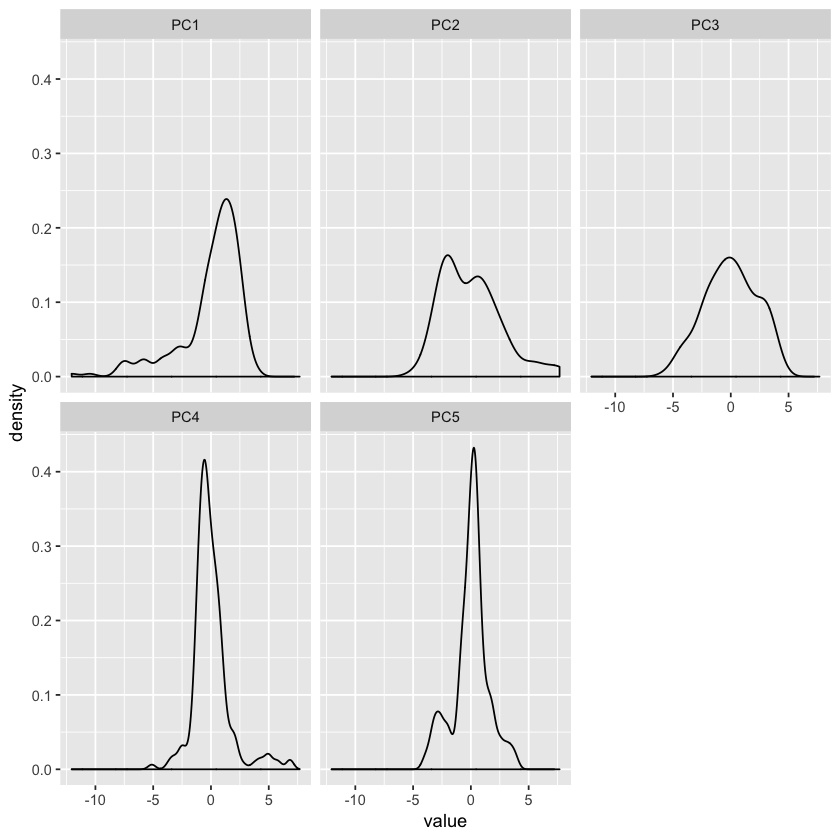

In [181]:
data %>% select(contains("PC")) %>%
    gather(pc, value) %>%
    ggplot(aes(value)) +
    geom_density() +
    facet_wrap(~pc)

In [182]:
age <- tibble(genus = NA, mean = NA, lower = NA, upper = NA, prob = NA, effect = NA)
bf <- tibble(genus = NA, mean = NA, lower = NA, upper = NA, prob = NA, effect = NA)
ccpost_ccpre <- tibble(genus = NA, mean = NA, lower = NA, upper = NA, prob = NA, effect = NA)
ccpost_noccpre <- tibble(genus = NA, mean = NA, lower = NA, upper = NA, prob = NA, effect = NA)
ccpost_noccpost <- tibble(genus = NA, mean = NA, lower = NA, upper = NA, prob = NA, effect = NA)
noccpre_ccpre <- tibble(genus = NA, mean = NA, lower = NA, upper = NA, prob = NA, effect = NA)
noccpost_noccpre <- tibble(genus = NA, mean = NA, lower = NA, upper = NA, prob = NA, effect = NA)
noccpost_ccpre <- tibble(genus = NA, mean = NA, lower = NA, upper = NA, prob = NA, effect = NA)
for (var_name in l_pc) {
    fit <- brm_sn_mi(var_name)
    df <- calc_treatment_effect(fit, var_name, summarise = F)
    df <- df %>% 
        mutate(            
            ccpost_ccpre = ccpost - ccpre,
            ccpost_noccpre = ccpost - noccpre,
            ccpost_noccpost = ccpost - noccpost,
            noccpre_ccpre = noccpre - ccpre,
            noccpost_noccpre = noccpost - noccpre,
            noccpost_ccpre = noccpost - ccpre) %>%
        select(ccpost_ccpre, ccpost_noccpre, ccpost_noccpost, noccpre_ccpre, noccpost_noccpre, noccpost_ccpre, age, bf) %>%
        gather(effect, value) %>%
        group_by(effect) %>%
        do(data.frame(
            mean = mean(.$value),
            lower = hpdi(.$value)[1],
            upper = hpdi(.$value)[2],
            prob = mean(.$value < 0)
        ))
    age <- rbind(age, tibble(genus = var_name, mean = df$mean[1], lower = df$lower[1], upper = df$upper[1], prob = df$prob[1], effect = "age"))
    bf <- rbind(bf, tibble(genus = var_name, mean = df$mean[2], lower = df$lower[2], upper = df$upper[2], prob = df$prob[2], effect = "bf"))
    ccpost_ccpre <- rbind(ccpost_ccpre, tibble(genus = var_name, mean = df$mean[3], lower = df$lower[3], upper = df$upper[3], prob = df$prob[3], effect = "ccpost_ccpre"))
    ccpost_noccpre <- rbind(ccpost_noccpre, tibble(genus = var_name, mean = df$mean[4], lower = df$lower[4], upper = df$upper[4], prob = df$prob[4], effect = "ccpost_noccpre"))
    ccpost_noccpost <- rbind(ccpost_noccpost, tibble(genus = var_name, mean = df$mean[5], lower = df$lower[5], upper = df$upper[5], prob = df$prob[5], effect = "ccpost_noccpost"))
    noccpre_ccpre <- rbind(noccpre_ccpre, tibble(genus = var_name, mean = df$mean[6], lower = df$lower[6], upper = df$upper[6], prob = df$prob[6], effect = "noccpre_ccpre"))
    noccpost_noccpre <- rbind(noccpost_noccpre, tibble(genus = var_name, mean = df$mean[7], lower = df$lower[7], upper = df$upper[7], prob = df$prob[7], effect = "noccpost_noccpre"))
    noccpost_ccpre <- rbind(noccpost_ccpre, tibble(genus = var_name, mean = df$mean[8], lower = df$lower[8], upper = df$upper[8], prob = df$prob[8], effect = "noccpost_ccpre"))
}

age <- na.omit(age)
bf <- na.omit(bf)
ccpost_ccpre <- na.omit(ccpost_ccpre)
ccpost_noccpre <- na.omit(ccpost_noccpre)
ccpost_noccpost <- na.omit(ccpost_noccpost)
noccpre_ccpre <- na.omit(noccpre_ccpre)
noccpost_noccpre <- na.omit(noccpost_noccpre)
noccpost_ccpre <- na.omit(noccpost_ccpre)



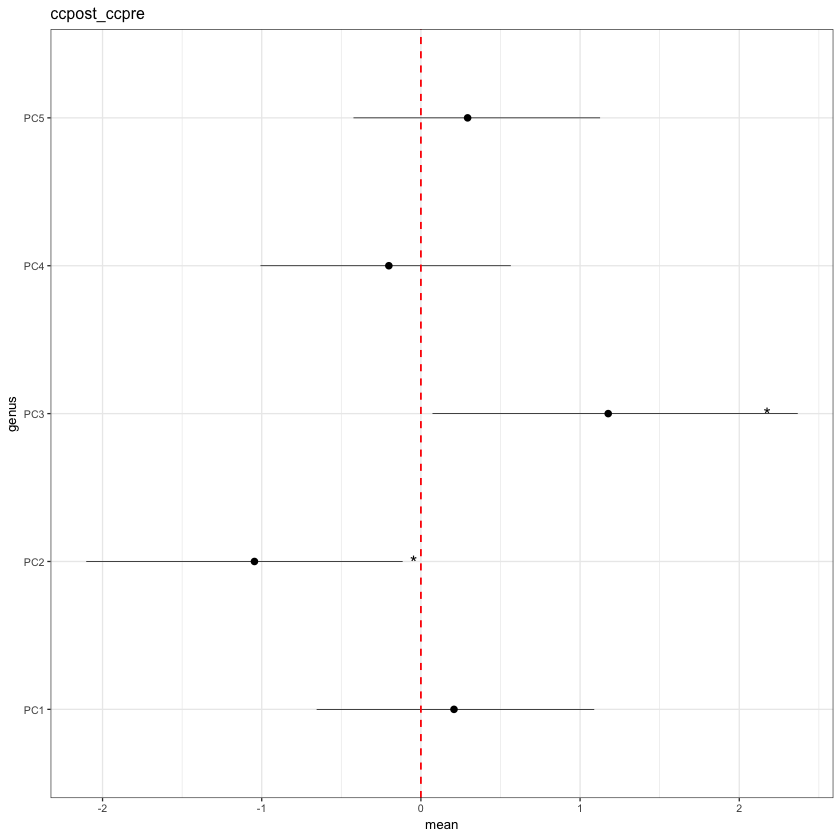

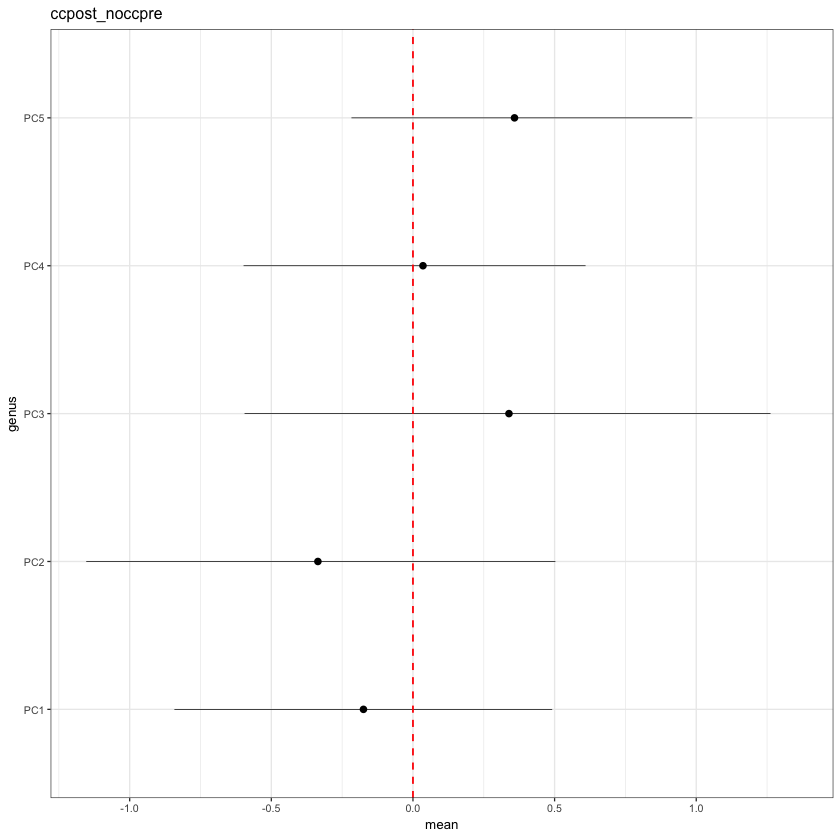

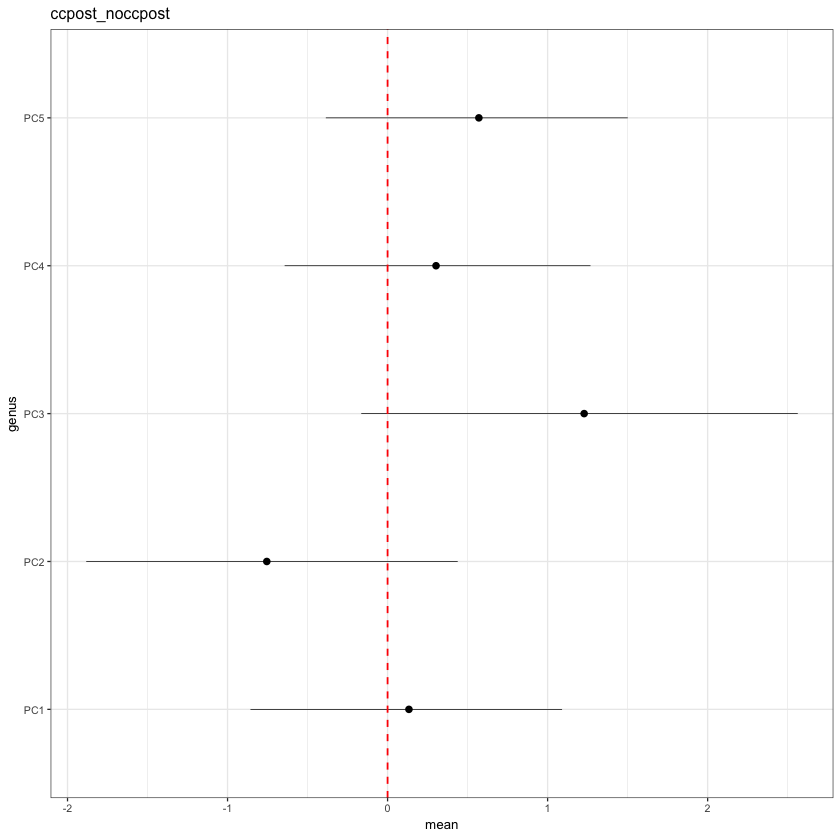

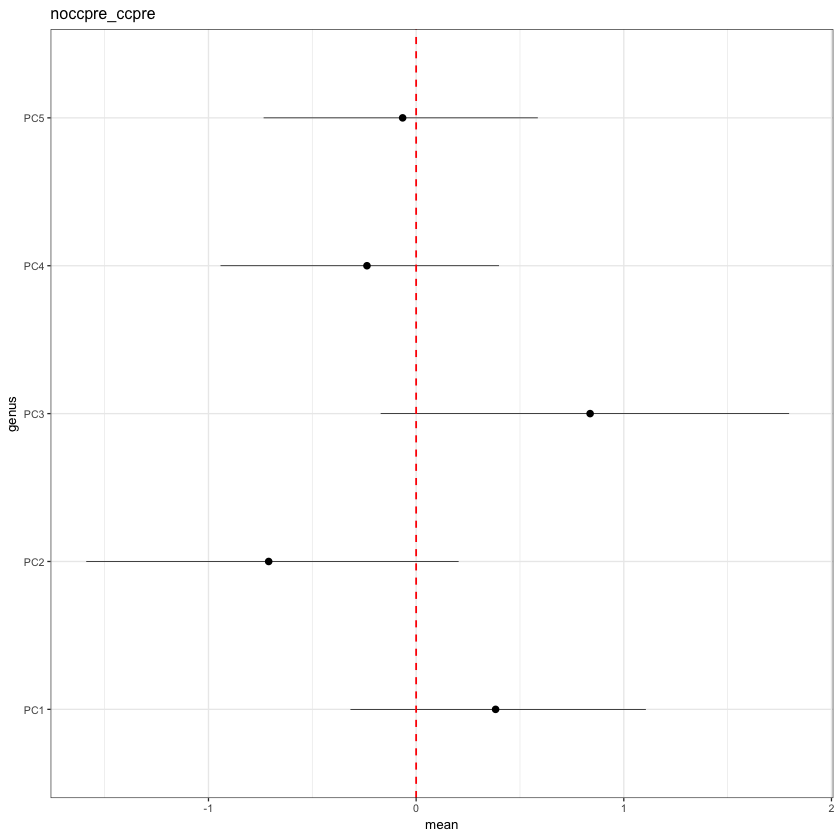

[[1]]

[[2]]

[[3]]

[[4]]

[[5]]

[[6]]


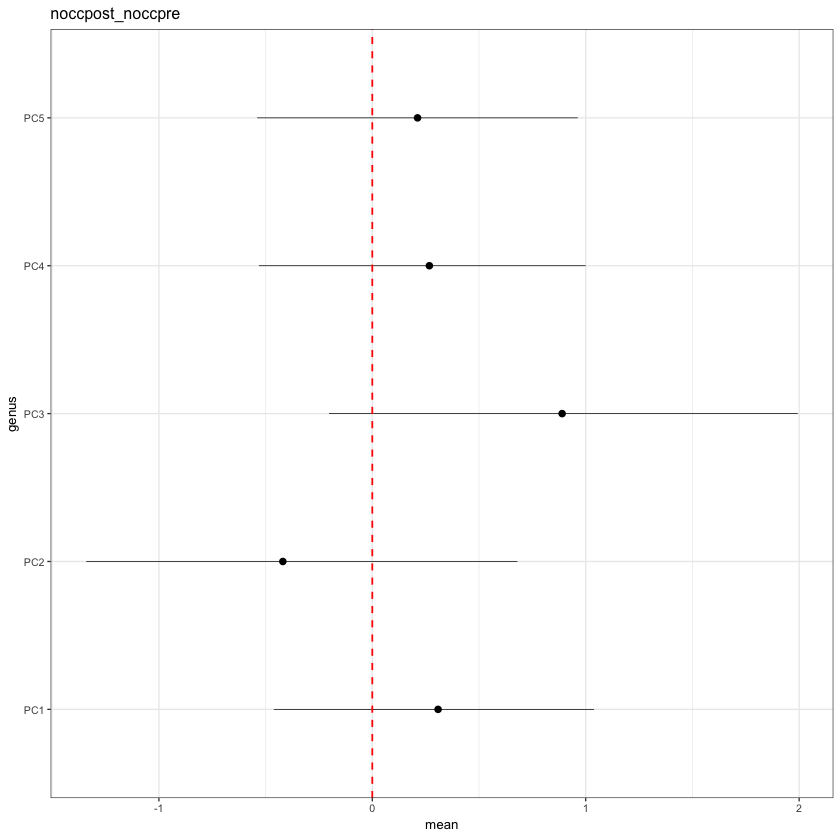

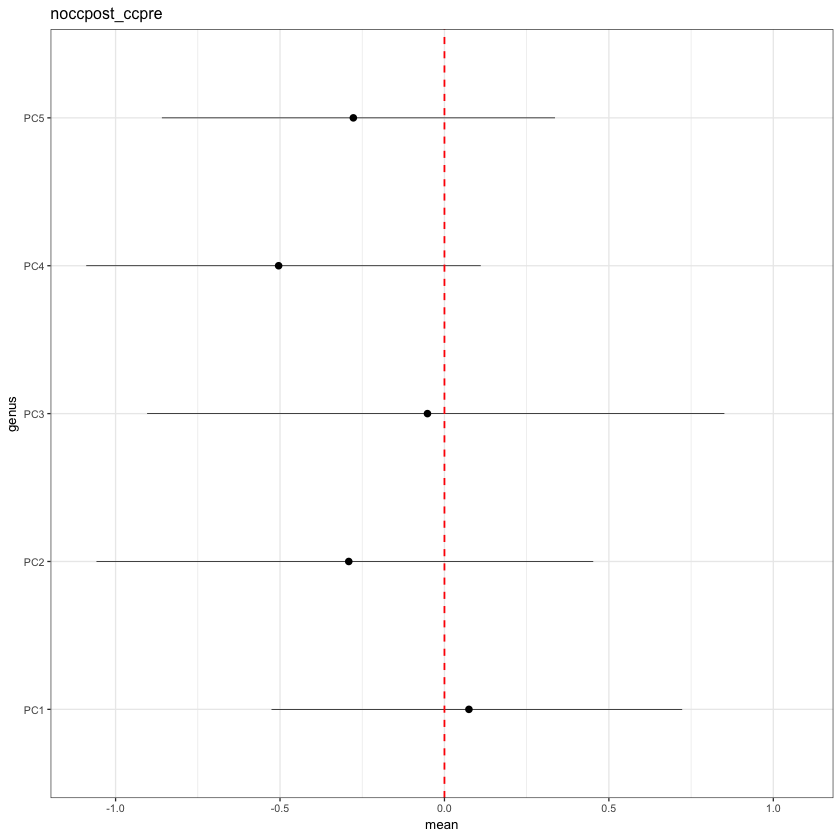

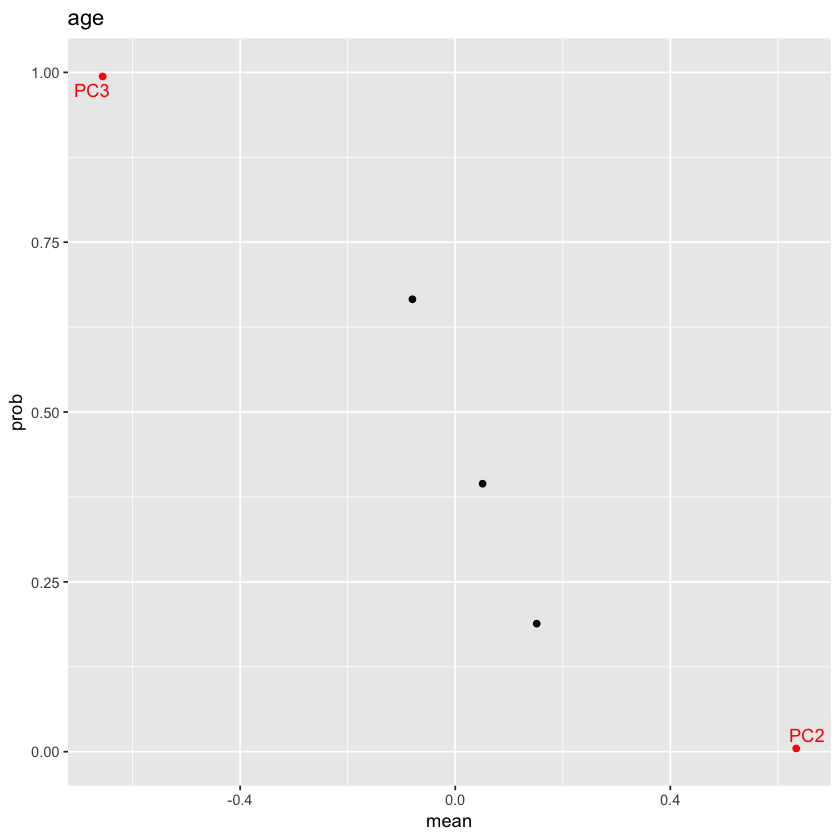

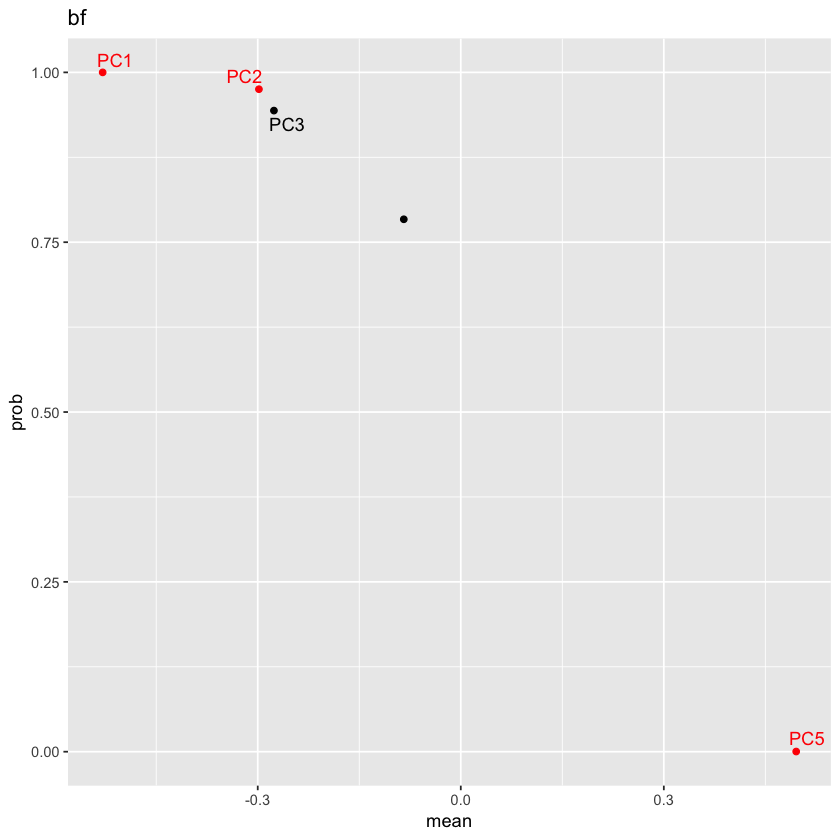

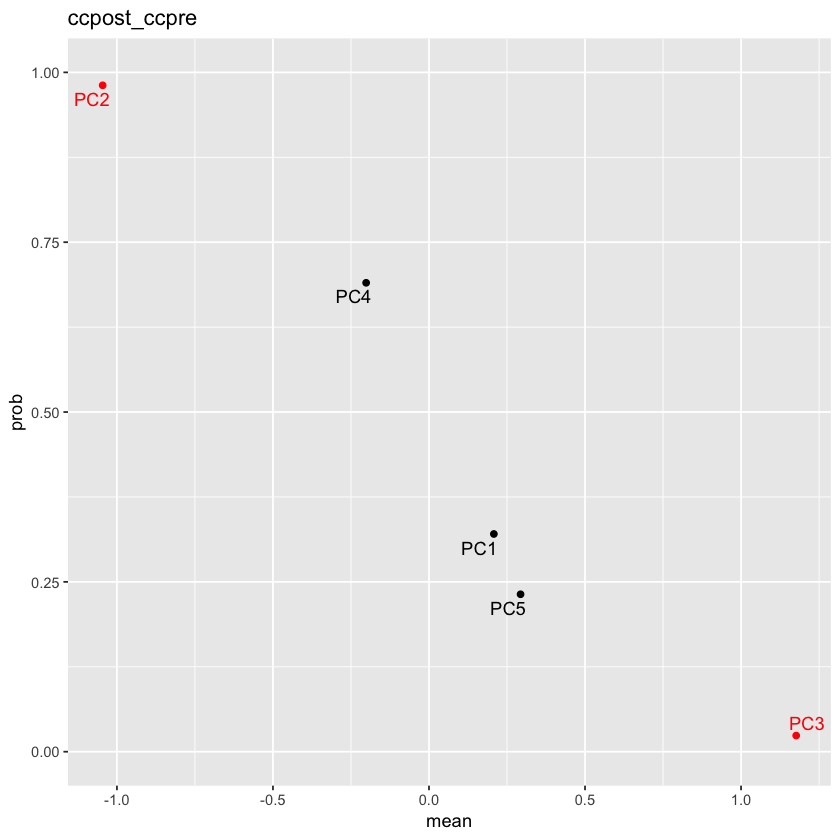

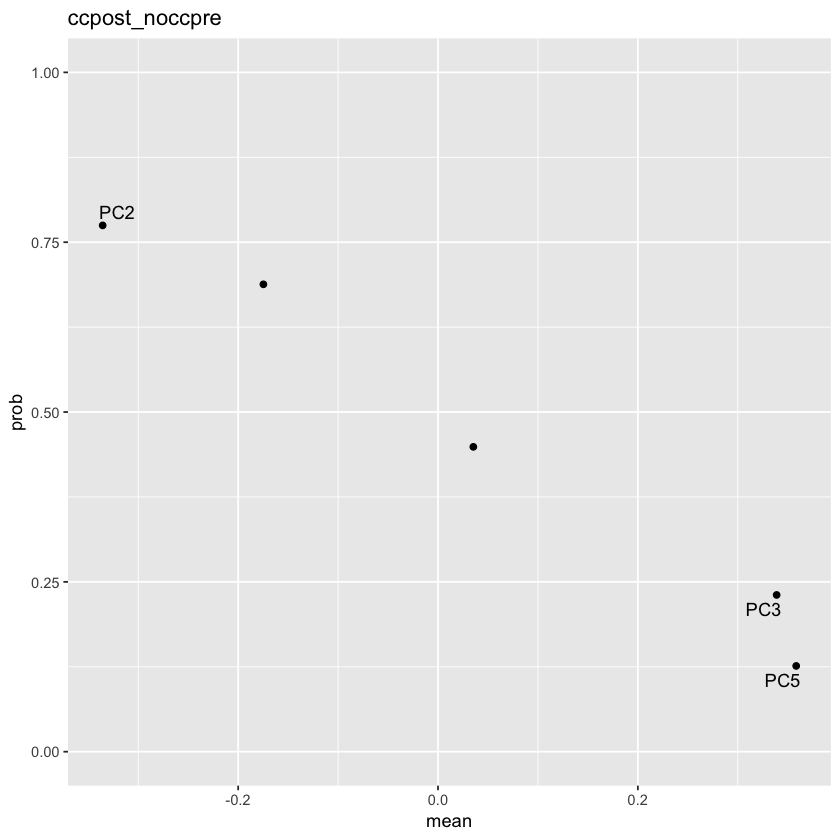

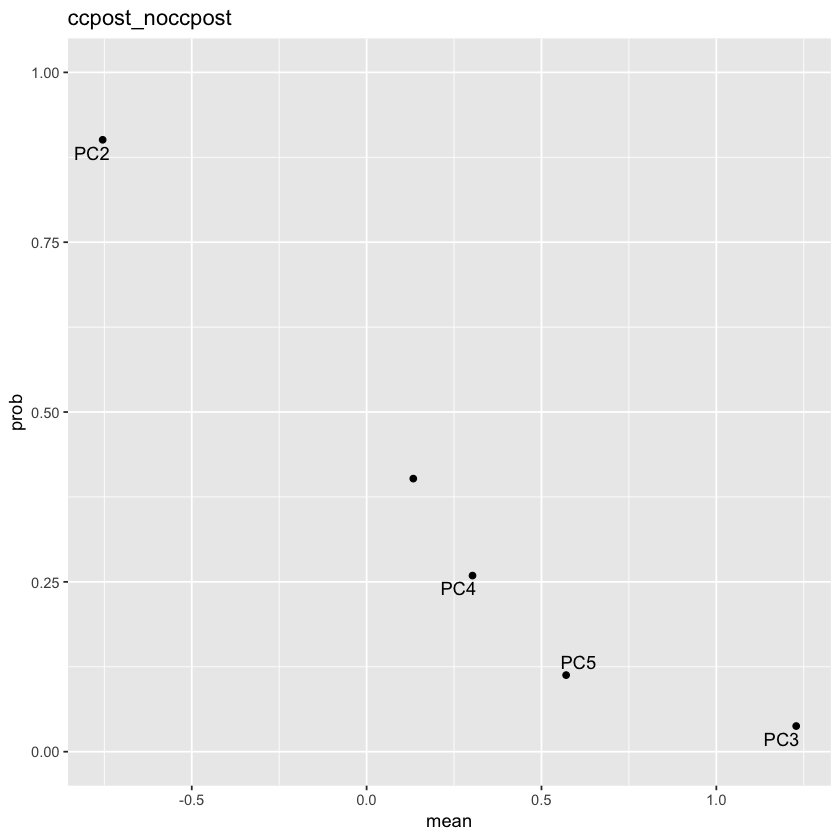

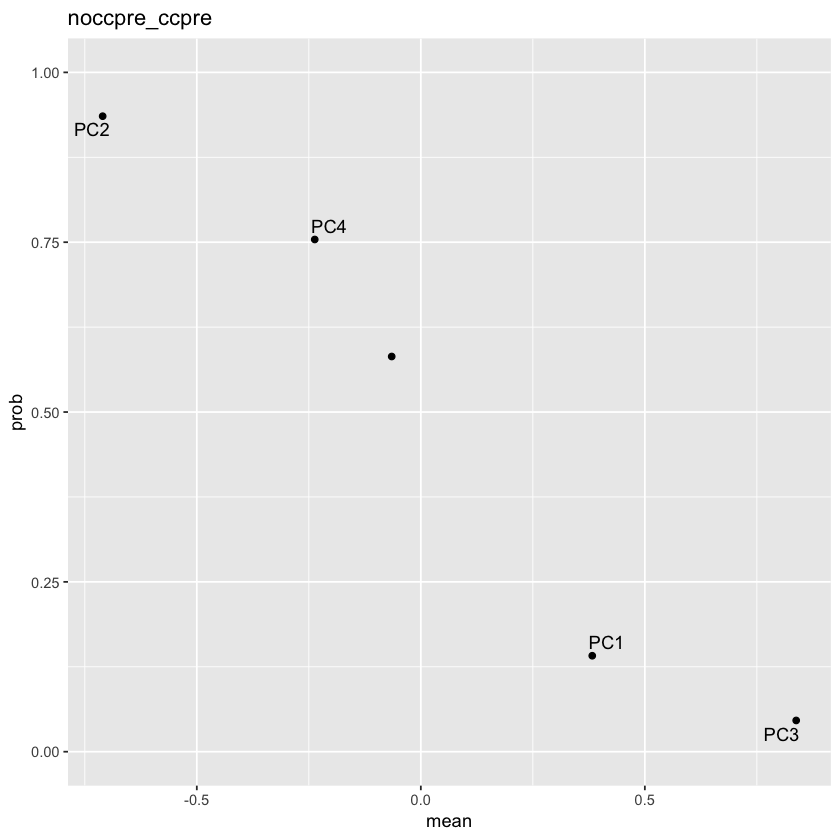

[[1]]

[[2]]

[[3]]

[[4]]

[[5]]

[[6]]

[[7]]

[[8]]


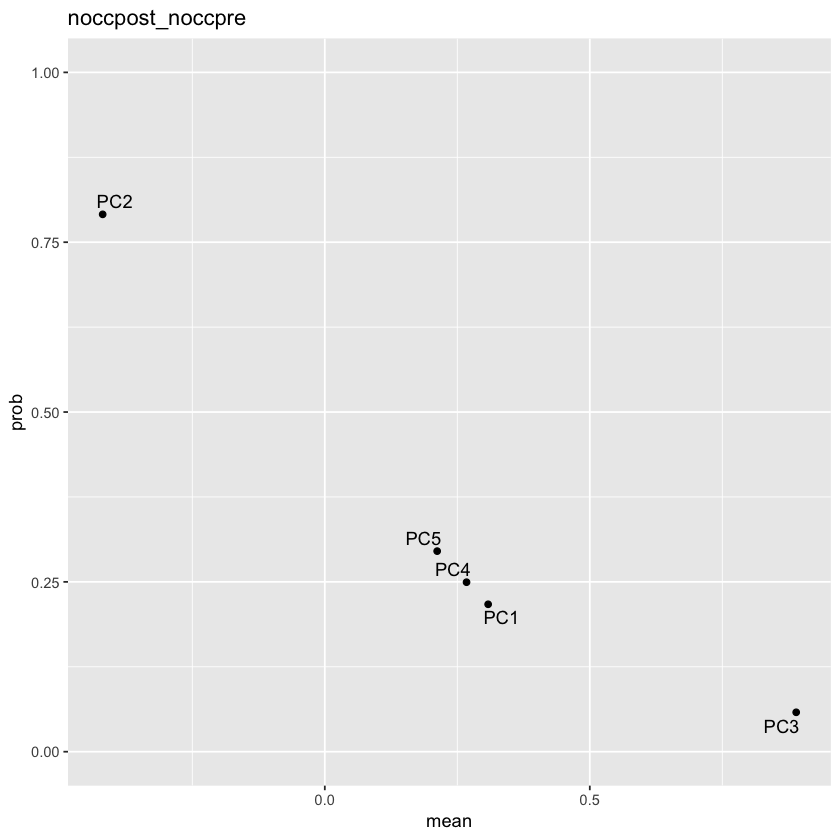

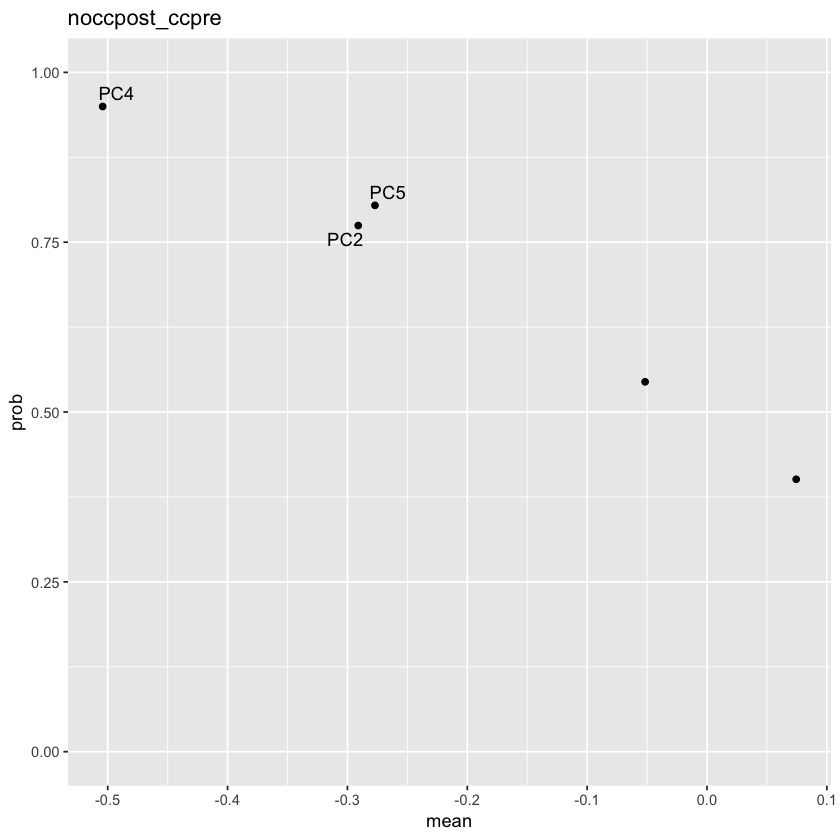

In [183]:
# how are effects distributed
dfs <- list(
    age = age, 
    bf = bf, 
    ccpost_ccpre = ccpost_ccpre, 
    ccpost_noccpre = ccpost_noccpre, 
    ccpost_noccpost = ccpost_noccpost,
    noccpre_ccpre = noccpre_ccpre,
    noccpost_noccpre = noccpost_noccpre,
    noccpost_ccpre = noccpost_ccpre
)
effects_vector <- c(
    "ccpost_ccpre", 
    "ccpost_noccpre",
    "ccpost_noccpost",
    "noccpre_ccpre",   
    "noccpost_noccpre",
    "noccpost_ccpre"
    )

lapply(effects_vector, function(x){
    df <- dfs[[x]] %>% mutate(prob = report_star_nondirectional(prob))
    p1 <- ggplot(df, aes(genus, mean, label = prob)) +
        geom_pointrange(aes(ymin = lower, ymax = upper), size = 0.2) +
        theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
        geom_text(nudge_y = 1) +
        ggtitle(x) +
        geom_hline(yintercept = 0, linetype = "dashed", color = "red") +
        coord_flip() +
        theme_bw(base_size = 8)
    p1
})

age <- age %>% 
    arrange(prob) %>%
    mutate(qvalue = cummean(prob))
bf <- bf %>% 
    arrange(prob) %>%
    mutate(qvalue = cummean(prob))
ccpost_ccpre <- ccpost_ccpre %>% 
    arrange(prob) %>%
    mutate(qvalue = cummean(prob))
ccpost_noccpre <- ccpost_noccpre %>% 
    arrange(prob) %>%
    mutate(qvalue = cummean(prob))
ccpost_noccpost <- ccpost_noccpost %>% 
    arrange(prob) %>%
    mutate(qvalue = cummean(prob))
noccpre_ccpre <- noccpre_ccpre %>% 
    arrange(prob) %>%
    mutate(qvalue = cummean(prob))
noccpost_noccpre <- noccpost_noccpre %>% 
    arrange(prob) %>%
    mutate(qvalue = cummean(prob))
noccpost_ccpre <- noccpost_ccpre %>% 
    arrange(prob) %>%
    mutate(qvalue = cummean(prob))


effects <- rbind(age, bf, ccpost_ccpre, ccpost_noccpre, ccpost_noccpost, noccpre_ccpre, noccpost_noccpre, noccpost_ccpre)

library(ggrepel)
lapply(effects$effect %>% unique(), function(x){
    effects %>% filter(effect == x) %>%
    ggplot(aes(mean, prob, color = ifelse(prob <= 0.025 | prob >= 0.975, "sig", "notsig"), label = ifelse(abs(mean)>= 0.2, genus, ""))) +
            geom_point() + 
            ggtitle(x) +
            scale_colour_manual(values = c("sig" = "red", "notsig" = "black")) +
            geom_text_repel() +
            ylim(0,1) +
            theme(legend.position="none")
})

In [89]:
library(microbiome)
data(dietswap)
ptest <- dietswap


In [94]:
ord <- ordinate(ptest, method = "PCoA", method = "euclidean")
ord

ERROR: Error in ordinate(ptest, method = "PCoA", method = "euclidean"): formal argument "method" matched by multiple actual arguments


In [25]:
otu_table(pseq.clr)

sa_10000    sa_10038    sa_10118   
Actinomycetaceae                  -0.91633265 -1.14874684 -1.28045907
Atopobium                         -0.87299251 -1.16968449 -1.10797446
Bifidobacterium                    5.59430079  5.80277536  5.77459839
Collinsella                        4.55273257  0.20986471  0.96567417
Corynebacterium                   -0.71957880 -0.73783754 -0.89009741
Eggerthella lenta et rel.          0.90583934  0.27502179 -0.16202796
Micrococcaceae                    -1.94050732 -1.55881084 -2.03890375
Propionibacterium                 -0.81055069 -0.79055455 -0.51260783
Asteroleplasma et rel.            -1.94373044 -1.89777041 -2.05302075
Aerococcus                        -1.93622460 -1.33623230 -2.00956760
Aneurinibacillus                  -1.93396423 -1.88422908 -2.05090025
Bacillus                          -0.81648943 -0.73681720 -0.89406496
Enterococcus                       0.06532698  4.29492090  0.21637263
Gemella                           -1.91781620 -1.83680762 -1.93944540
Granulicatella                    -1.91744274  1.81537447 -1.57865614
Lactobacillus gasseri et rel.      1.00144843  0.62492122  0.58441201
Lactobacillus plantarum et rel.    3.83542738  0.98730775  0.96433945
Lactobacillus salivarius et rel.  -0.78141384 -0.69286914 -0.94329659
Lactococcus                       -0.74553220 -0.71040498 -0.90320145
Staphylococcus                    -1.06730654 -1.14622224 -1.08256650
Streptococcus bovis et rel.        1.93760975  5.80259065  4.56615660
Streptococcus intermedius et rel. -0.32928500  0.94074088  0.13318586
Streptococcus mitis et rel.        1.28821844  4.32408720  3.35567956
Weissella et rel.                 -0.67915777 -0.63054069 -0.76588804
Wissella et rel.                  -1.78495190 -1.87170563 -2.06565372
Allistipes et rel.                 2.45395250  0.85452490  2.10119500
Bacteroides fragilis et rel.       0.86152144  0.58870060  1.96646781
Bacteroides intestinalis et rel.  -1.49663373 -1.86238142  0.08160188
Bacteroides ovatus et rel.         0.78084194  0.44466486  2.09241520
Bacteroides plebeius et rel.       0.49007429 -0.08226376  1.27060246
⋮                                 ⋮           ⋮           ⋮          
Alcaligenes faecalis et rel.      -0.55185619 -0.5114675   0.58557838
Anaerobiospirillum                -1.94382389 -1.8934885  -2.04537582
Aquabacterium                     -1.91611491 -1.8881037  -2.05630065
Bilophila et rel.                 -0.84264142 -0.7855608  -0.95608937
Burkholderia                      -1.67273409 -1.3478516  -1.17344547
Campylobacter                      0.15136727  0.1919428   0.03336306
Desulfovibrio et rel.             -0.29357133 -0.2764544  -0.43712111
Enterobacter aerogenes et rel.     0.57889517  0.8823800   0.52127219
Escherichia coli et rel.           0.87066552  0.8907369   2.31718612
Haemophilus                       -1.23540343 -1.1911204  -1.26643994
Helicobacter                      -0.33031844 -0.2798513  -0.41838488
Klebisiella pneumoniae et rel.     0.01557617  0.3293357   0.80672650
Leminorella                       -1.92111367 -1.8890826  -2.05523483
Methylobacterium                  -1.93843504 -1.8921293  -2.04605195
Moraxellaceae                     -1.24414961 -1.1855609  -1.32445157
Novosphingobium                   -1.88953180 -1.8518066  -1.91958505
Oceanospirillum                    0.66405094 -0.4571588  -0.63944965
Oxalobacter formigenes et rel.     0.05875907 -0.4587223  -0.73753756
Proteus et rel.                    0.15382690  0.1896364   0.01472333
Pseudomonas                       -1.21675796 -1.1790069  -1.32276410
Serratia                          -1.89800805 -1.6591674   0.65188639
Sutterella wadsworthia et rel.     0.51842249  0.4306480   0.30410919
Vibrio                            -0.10855719 -0.4805799  -0.58934607
Xanthomonadaceae                  -1.11595161 -1.1036048  -1.19784283
Yersinia et rel.                  -0.53598166 -0.4674300  -0.63461587
Brachyspira                       -1.2414326

In [136]:
testset <- otu_to_df(pseq.clr) %>% gather(genus, value, -sample_id)
head(testset)

sample_id genus            value     
1 sa_10000  Actinomycetaceae -0.9163325
2 sa_10038  Actinomycetaceae -1.1487467
3 sa_10118  Actinomycetaceae -1.2804589
4 sa_10211  Actinomycetaceae -1.0078685
5 sa_10230  Actinomycetaceae -0.8338621
6 sa_10247  Actinomycetaceae -0.4083876

In [141]:
tdata <- 
    data %>%
    select(subject_id, sample_id, time, cc, age_d_s, bf_count_s) %>%
    left_join(testset, by = "sample_id")
tdata %>% head()

subject_id sample_id time cc age_d_s   bf_count_s
1 207        sa_10000  post no 0.0320946 0.4394854 
2 207        sa_10000  post no 0.0320946 0.4394854 
3 207        sa_10000  post no 0.0320946 0.4394854 
4 207        sa_10000  post no 0.0320946 0.4394854 
5 207        sa_10000  post no 0.0320946 0.4394854 
6 207        sa_10000  post no 0.0320946 0.4394854 
  genus                        value     
1 Actinomycetaceae             -0.9163325
2 Aerococcus                   -1.9362266
3 Aeromonas                    -1.9384429
4 Akkermansia                  -0.6508434
5 Alcaligenes faecalis et rel. -0.5518561
6 Allistipes et rel.            2.4539552

In [ ]:
tfit <- brm(value ~ 1 + time*cc + age_d_s + bf_count_s + (1+time+age_d_s + bf_count_s|subject_id) + (1 + ))

In [141]:
otus.clr <- 
    otu_to_df(pseq.clr, transpose = F) %>% 
    column_to_rownames("species") %>%
    select(meta_new$sample_id) %>%
    t()
meta_clr <- sd_to_df(pseq.clr) %>% column_to_rownames("sample_id")
otus.clr %>% dim()

Warning message in class(x) <- c(subclass, "tbl_df", "tbl", "data.frame"):
“Setting class(x) to multiple strings ("tbl_df", "tbl", ...); result will no longer be an S4 object”Warning message:
“Setting row names on a tibble is deprecated.”

[1] 196 130

In [166]:
meta.clr <- sd_to_df(pseq.clr) %>% na.omit()
otus.clr <- otu_to_df(pseq.clr, transpose = F)  %>%
    gather(sample_id, value, -species) %>%
    spread(species, value) %>% 
    filter(sample_id %in% meta.clr$sample_id) %>%
    column_to_rownames("sample_id")

Warning message in class(x) <- c(subclass, "tbl_df", "tbl", "data.frame"):
“Setting class(x) to multiple strings ("tbl_df", "tbl", ...); result will no longer be an S4 object”

In [ ]:
# clr/euclidean
meta.clr <- sd_to_df(pseq.clr) %>% na.omit()
otus.clr <- otu_to_df(pseq.clr, transpose = F) %>% 
    column_to_rownames("species") %>%
    select(meta.clr$sample_id) %>%
    t() 

# Homogeneity assumption 
dist <- vegdist(otus.clr, method = "euclidean")
anova(betadisper(dist, meta.clr$cc))
anova(betadisper(dist, meta.clr$time))
anova(betadisper(dist, meta.clr$groups))
pm <- adonis(otus.clr ~ time * cc + age_d_s + bf_count_s, method = "euclidean", data = meta.clr)

In [169]:
pm <- adonis(otus.clr ~ time * cc + age_d_s + bf_count_s + sibling + childsex, method = "euclidean", data = meta.clr)

In [170]:
pm$aov.tab

Df  SumsOfSqs  MeanSqs   F.Model  R2          Pr(>F)
time         1   52.61316  52.61316 1.312364 0.007113164 0.172 
cc           1   47.49937  47.49937 1.184807 0.006421792 0.272 
age_d_s      1   73.56147  73.56147 1.834891 0.009945321 0.045 
bf_count_s   1  211.38025 211.38025 5.272594 0.028578066 0.001 
sibling      1  102.37403 102.37403 2.553582 0.013840706 0.012 
childsex     1   60.40861  60.40861 1.506811 0.008167089 0.108 
time:cc      1   33.39091  33.39091 0.832891 0.004514364 0.600 
Residuals  170 6815.36269  40.09037       NA 0.921419498    NA 
Total      177 7396.59048        NA       NA 1.000000000    NA

In [158]:
meta.clr %>% dim()

[1] 196  19

In [160]:
meta.clr

sample_id subject_id time cc  age_d  age_d_s     bf_count   bf_count_s 
1   sa_10000  207        post no   98.00  0.0320946   6.0000000  0.43948544
2   sa_10038  388        post yes  98.00  0.0320946   0.0000000 -1.65710371
3   sa_10118  381        post yes 108.00  0.5275689   6.5900000  0.64565004
4   sa_10211  283        post yes 107.03  0.4795079   5.0000000  0.09005391
5   sa_10230  216        post no  100.00  0.1311895   7.0000000  0.78891696
6   sa_10247  277        pre  yes  79.00 -0.9093066   6.1000000  0.47442859
7   sa_1025   373        post no  113.00  0.7753060   6.0000000  0.43948544
8   sa_10268  245        pre  no   68.00 -1.4543283   6.7611111  0.70544165
9   sa_1028   311        pre  no   75.00 -1.1074963   7.2000000  0.85880327
10  sa_1030   213        pre  yes  88.00 -0.4633797   6.4583333  0.59964155
11  sa_1045   443        post no  114.00  0.8248535          NA          NA
12  sa_1054   354        pre  yes 118.00  1.0230432   6.5756250  0.64062696
13  sa_10657  422        post yes 129.00  1.5680649   0.0000000 -1.65710371
14  sa_10742  319        post yes 108.00  0.5275689   0.0000000 -1.65710371
15  sa_10747  233        pre  yes  73.00 -1.2065911   0.5555556 -1.46297508
16  sa_108    309        pre  no   75.00 -1.1074963   2.8660836 -0.65560376
17  sa_10812  259        pre  no   76.00 -1.0579488   7.4000000  0.92868957
18  sa_10840  264        pre  yes  92.00 -0.2651900   5.9408333  0.41881074
19  sa_10944  449        post no  112.00  0.7257586   5.4325000  0.24118305
20  sa_11040  431        pre  yes 123.00  1.2707803   5.1764706  0.15171830
21  sa_11136  269        pre  yes  84.00 -0.6615694  11.4018182  2.32705100
22  sa_11180  204        pre  no   72.00 -1.2561386   2.5000000 -0.78352490
23  sa_11183  202        pre  yes  75.00 -1.1074963   7.4500000  0.94616115
24  sa_11190  308        post no  105.00  0.3789266   5.0000000  0.09005391
25  sa_11210  321        post yes 100.00  0.1311895   5.1250000  0.13373285
26  sa_1127   338        post yes 100.00  0.1311895   6.2850000  0.53907342
27  sa_11392  392        pre  yes 105.00  0.3789266   7.6442857  1.01405070
28  sa_11488  322        pre  no   68.00 -1.4543283   8.8591297  1.43855548
29  sa_11498  392        post yes 135.00  1.8653495   5.0000000  0.09005391
30  sa_115    421        post yes 107.00  0.4780215   5.0000000  0.09005391
⋮   ⋮         ⋮          ⋮    ⋮   ⋮      ⋮           ⋮          ⋮          
167 sa_8678   297        pre  no   76    -1.05794885 4.700000   -0.01477554
168 sa_8703   245        post no   99     0.08164203 5.947500    0.42114028
169 sa_8715   260        post no   98     0.03209460 5.500000    0.26476967
170 sa_881    397        pre  no   84    -0.66156941 5.409091    0.23300317
171 sa_8818   448        post yes 127     1.46897006       NA            NA
172 sa_8833   298        post no  108     0.52756889 0.000000   -1.65710371
173 sa_8856   408        post no  113     0.77530604 0.000000   -1.65710371
174 sa_886    391        post no  111     0.67621118 0.000000   -1.65710371
175 sa_8869   350        post yes 137     1.96444435 0.000000   -1.65710371
176 sa_8998   275        post yes 137     1.96444435       NA            NA
177 sa_9001   320        post no   98     0.03209460 0.000000   -1.65710371
178 sa_9022   381        pre  yes  78    -0.95885399 8.228000    1.21801887
179 sa_9030   210        pre  yes 111     0.67621118 0.000000   -1.65710371
180 sa_9080   349        post no  112     0.72575861 6.750000    0.70155908
181 sa_9091   273        post yes 133     1.76625463 8.500000    1.31306425
182 sa_9232   322        post no   98     0.03209460 8.250000    1.22570637
183 sa_9343   254        post yes 118     1.02304319 6.800000    0.71903066
184 sa_9352   260        pre  no   68    -1.45432828 6.055556    0.45889830
185 sa_9408   316        post yes 108     0.52756889 6.625000    0.65788014
186 sa_9412   234        pre  no   70    -1.35523343 0.000000   -1.65710371
187 sa_9462   336        pre  yes 105     0.37892661